# Synthetic Dataset for Risk Assessment and Loan Approval Modeling
This synthetic dataset comprises `20,000` records of personal and financial data, designed to facilitate the development of predictive models for risk assessment. It serves two primary purposes:

> Risk Score Regression: To predict a continuous risk score associated with each individual's likelihood of loan default or financial instability.

> Binary Classification: To determine the binary outcome of loan approval, indicating whether an applicant is likely to be approved or denied for a loan.

The dataset includes diverse features such as demographic information, credit history, employment status, income levels, existing debt, and other relevant financial metrics, providing a comprehensive foundation for sophisticated data-driven analysis and decision-making.

In [85]:
import numpy as np
import pandas as pd
#for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
#for preprocessing
from sklearn.preprocessing import StandardScaler
# for Evaluation
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score,accuracy_score,classification_report
from sklearn.model_selection import train_test_split
#models
#for regression algorithms
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, AdaBoostRegressor,BaggingRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
# For classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import model_selection
#
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier

In [86]:
df=pd.read_csv(r'C:\Users\USER\Desktop\python works\LoanApproval\Loan.csv')
df

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179141,0.070210,1,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2072-09-29,44,30180,587,Employed,High School,19,24521,36,Married,...,2515.000000,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0
19996,2072-09-30,56,49246,567,Employed,Associate,33,25818,36,Married,...,4103.833333,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0
19997,2072-10-01,44,48958,645,Employed,Bachelor,20,37033,72,Married,...,4079.833333,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,45.0
19998,2072-10-02,60,41025,560,Employed,High School,36,14760,72,Married,...,3418.750000,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,59.0


# Step1 : Understand the data

In [87]:
df.shape

(20000, 36)

In [88]:
pip show scikit-learn

Name: scikit-learn
Version: 1.7.2
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License-Expression: BSD-3-Clause
Location: c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [89]:
print('The features of the Dataset')
# features=len(df.columns)
features_list=[feature for feature in df.columns]
for feature in features_list:
    print(feature)

The features of the Dataset
ApplicationDate
Age
AnnualIncome
CreditScore
EmploymentStatus
EducationLevel
Experience
LoanAmount
LoanDuration
MaritalStatus
NumberOfDependents
HomeOwnershipStatus
MonthlyDebtPayments
CreditCardUtilizationRate
NumberOfOpenCreditLines
NumberOfCreditInquiries
DebtToIncomeRatio
BankruptcyHistory
LoanPurpose
PreviousLoanDefaults
PaymentHistory
LengthOfCreditHistory
SavingsAccountBalance
CheckingAccountBalance
TotalAssets
TotalLiabilities
MonthlyIncome
UtilityBillsPaymentHistory
JobTenure
NetWorth
BaseInterestRate
InterestRate
MonthlyLoanPayment
TotalDebtToIncomeRatio
LoanApproved
RiskScore


Explanation of the features in the dataset:

1. **ApplicationDate**: The date when the loan application was submitted.
2. **Age**: The age of the loan applicant.
3. **AnnualIncome**: The yearly income of the applicant, typically used to evaluate loan repayment capacity.
4. **CreditScore**: A numerical representation of the applicant’s creditworthiness based on their credit history.
5. **EmploymentStatus**: The current employment status of the applicant (e.g., employed, unemployed, self-employed).
6. **EducationLevel**: The highest level of education attained by the applicant.
7. **Experience**: The number of years the applicant has been in their current occupation or field.
8. **LoanAmount**: The amount of money the applicant is requesting as a loan.
9. **LoanDuration**: The period (in months or years) over which the loan is to be repaid.
10. **MaritalStatus**: The marital status of the applicant (e.g., single, married, divorced).
11. **NumberOfDependents**: The number of people financially dependent on the applicant (e.g., children, elderly parents).
12. **HomeOwnershipStatus**: Whether the applicant owns, rents, or has other living arrangements regarding their home.
13. **MonthlyDebtPayments**: The total amount the applicant is currently paying each month toward their existing debts.
14. **CreditCardUtilizationRate**: The percentage of available credit being used by the applicant (credit card balance divided by total credit limit).
15. **NumberOfOpenCreditLines**: The number of active credit accounts the applicant has (e.g., credit cards, loans).
16. **NumberOfCreditInquiries**: The number of times a credit inquiry has been made on the applicant’s account (usually when applying for credit).
17. **DebtToIncomeRatio**: The ratio of the applicant’s total monthly debt payments to their monthly income, used to assess their ability to take on more debt.
18. **BankruptcyHistory**: Indicates whether the applicant has filed for bankruptcy in the past.
19. **LoanPurpose**: The reason why the applicant is seeking the loan (e.g., home improvement, education, medical).
20. **PreviousLoanDefaults**: The number of times the applicant has defaulted on previous loans.
21. **PaymentHistory**: A record of the applicant’s past payments on loans and credit lines.
22. **LengthOfCreditHistory**: The number of years the applicant has had active credit accounts.
23. **SavingsAccountBalance**: The amount of money in the applicant’s savings account.
24. **CheckingAccountBalance**: The amount of money in the applicant’s checking account.
25. **TotalAssets**: The total value of assets owned by the applicant (e.g., property, vehicles, investments).
26. **TotalLiabilities**: The total amount of liabilities (debts) the applicant owes.
27. **MonthlyIncome**: The applicant’s total monthly income.
28. **UtilityBillsPaymentHistory**: A record of how well the applicant has managed paying their utility bills.
29. **JobTenure**: The length of time the applicant has held their current job.
30. **NetWorth**: The difference between the applicant’s total assets and total liabilities.
31. **BaseInterestRate**: The general interest rate set by the financial institution or the market.
32. **InterestRate**: The specific interest rate offered to the applicant for the loan.
33. **MonthlyLoanPayment**: The amount the applicant will need to pay each month to repay the loan.
34. **TotalDebtToIncomeRatio**: A more comprehensive debt-to-income ratio that includes all of the applicant’s liabilities.
35. **`LoanApproved`**: Indicates whether the loan was approved or not (usually binary: Yes/No).
36. **`RiskScore`**: A score representing the risk level of the applicant, usually derived from various financial and personal factors to help determine loan approval and interest rate.

These features help in assessing the financial health, creditworthiness, and risk profile of the loan applicant, which ultimately determines loan approval, terms, and interest rates.

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [91]:
df.describe()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,39.752600,59161.473550,571.612400,17.522750,24882.867800,54.057000,1.517300,454.292700,0.286381,3.023350,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.766780
std,11.622713,40350.845168,50.997358,11.316836,13427.421217,24.664857,1.386325,240.507609,0.159793,1.736161,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.778262
min,18.000000,15000.000000,343.000000,0.000000,3674.000000,12.000000,0.000000,50.000000,0.000974,0.000000,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,28.800000
25%,32.000000,31679.000000,540.000000,9.000000,15575.000000,36.000000,0.000000,286.000000,0.160794,2.000000,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,40.000000,48566.000000,578.000000,17.000000,21914.500000,48.000000,1.000000,402.000000,0.266673,3.000000,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,48.000000,74391.000000,609.000000,25.000000,30835.000000,72.000000,2.000000,564.000000,0.390634,4.000000,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770758,0.509214,0.000000,56.000000
max,80.000000,485341.000000,712.000000,61.000000,184732.000000,120.000000,5.000000,2919.000000,0.917380,13.000000,...,25000.000000,0.999433,16.000000,2.603208e+06,0.405029,0.446787,10892.629520,4.647657,1.000000,84.000000


In [92]:
df.describe(include=['O'])

,ApplicationDate,EmploymentStatus,EducationLevel,MaritalStatus,HomeOwnershipStatus,LoanPurpose
count,20000,20000,20000,20000,20000,20000
unique,20000,3,5,4,4,5
top,2018-01-01,Employed,Bachelor,Married,Mortgage,Home
freq,1,17036,6054,10041,7939,5925


# Visualization

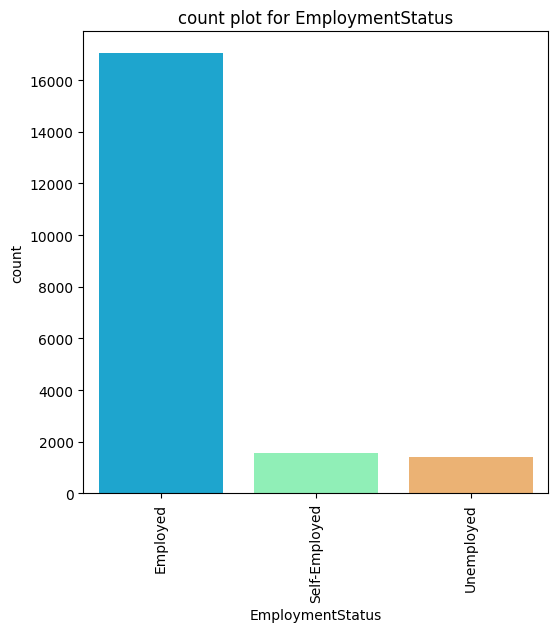

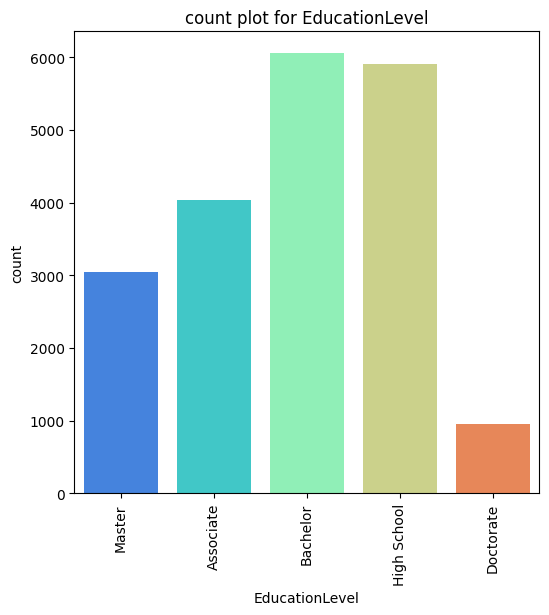

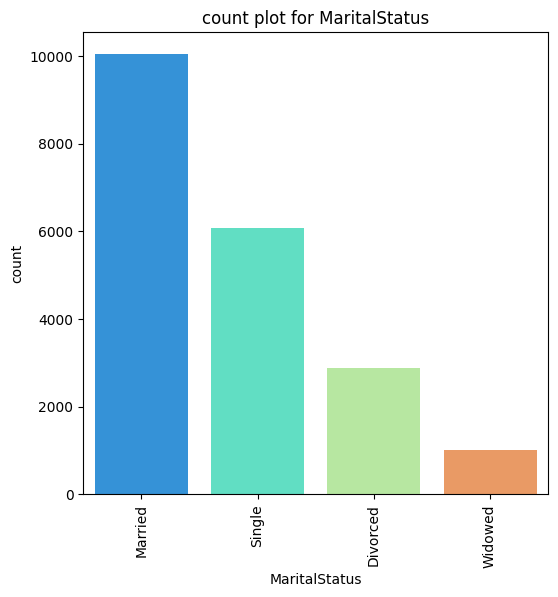

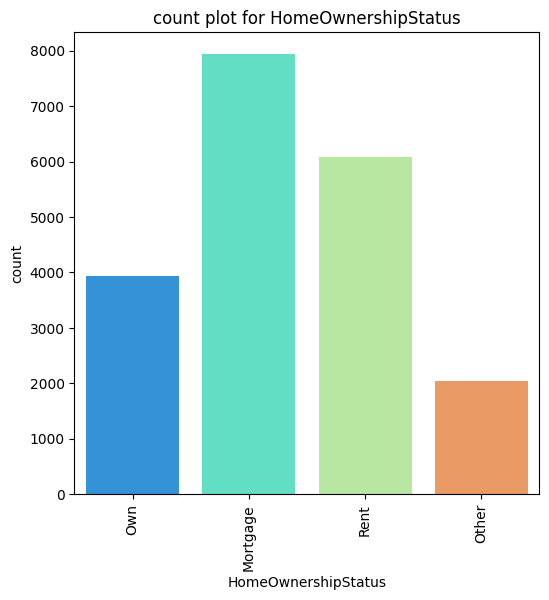

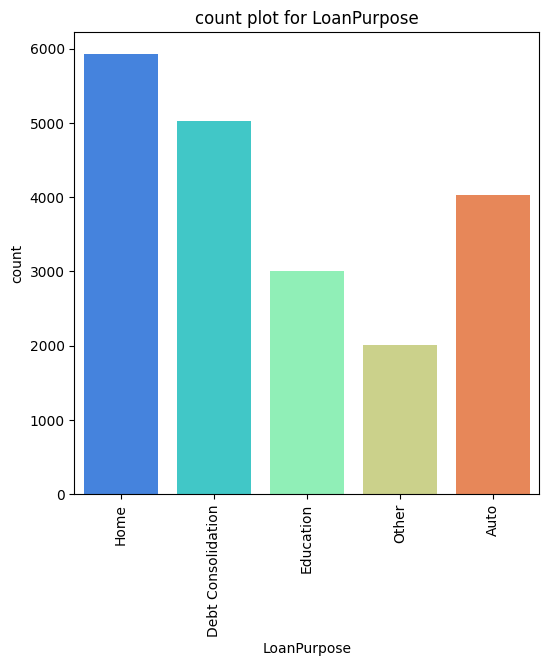

In [93]:
categorical_cols=df.select_dtypes(include=['object','category']).columns.tolist()
for col in categorical_cols[1:]:
    plt.figure(figsize=(6,6))
    sns.countplot(data=df,x=col,hue=col,palette='rainbow')
    plt.title(f"count plot for {col}")
    plt.xticks(rotation=90)
    plt.show()

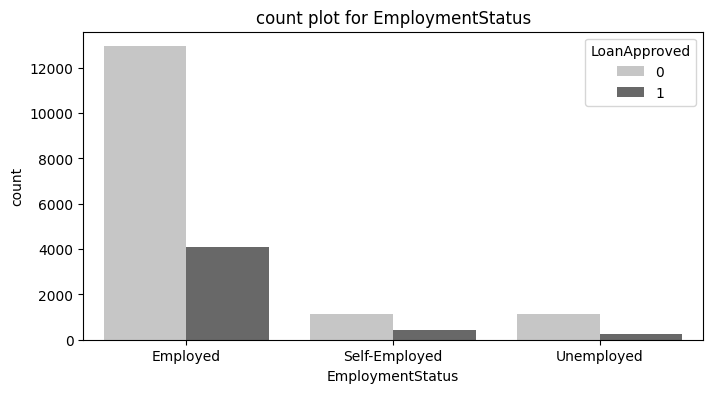

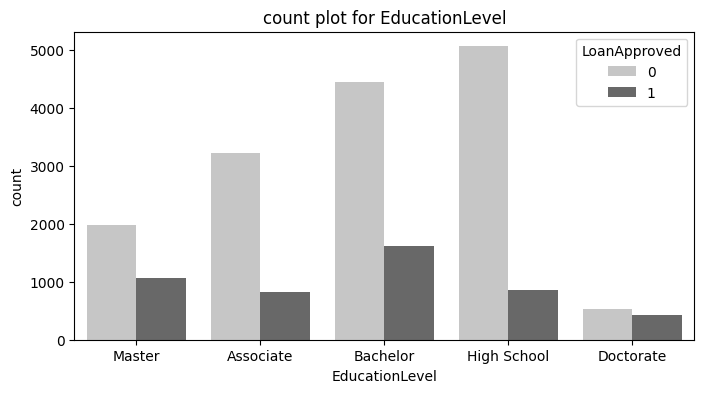

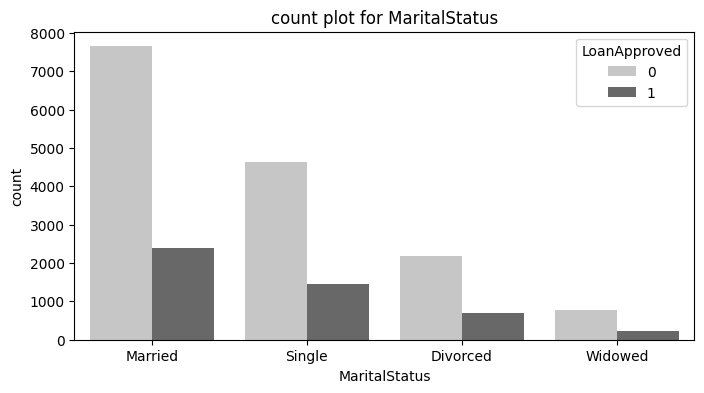

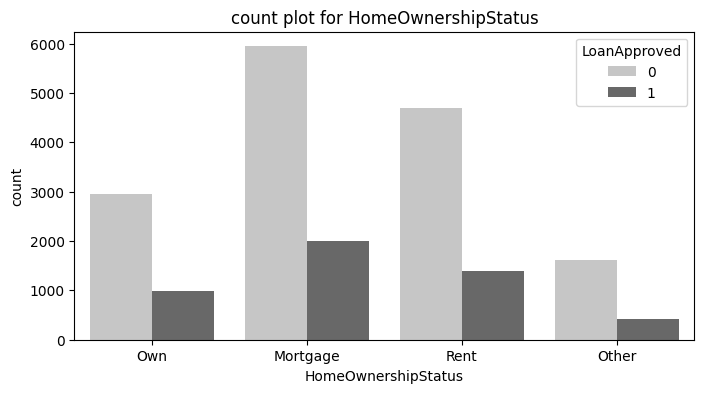

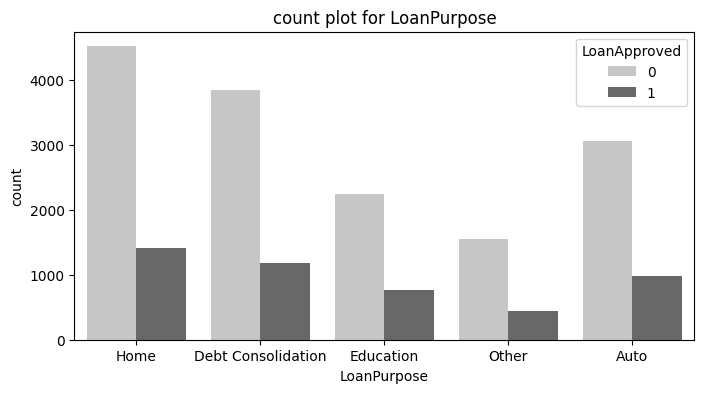

In [94]:
for col in categorical_cols[1:]:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df,x=col,hue='LoanApproved',palette='Greys')
    plt.title(f"count plot for {col}")
    plt.show()

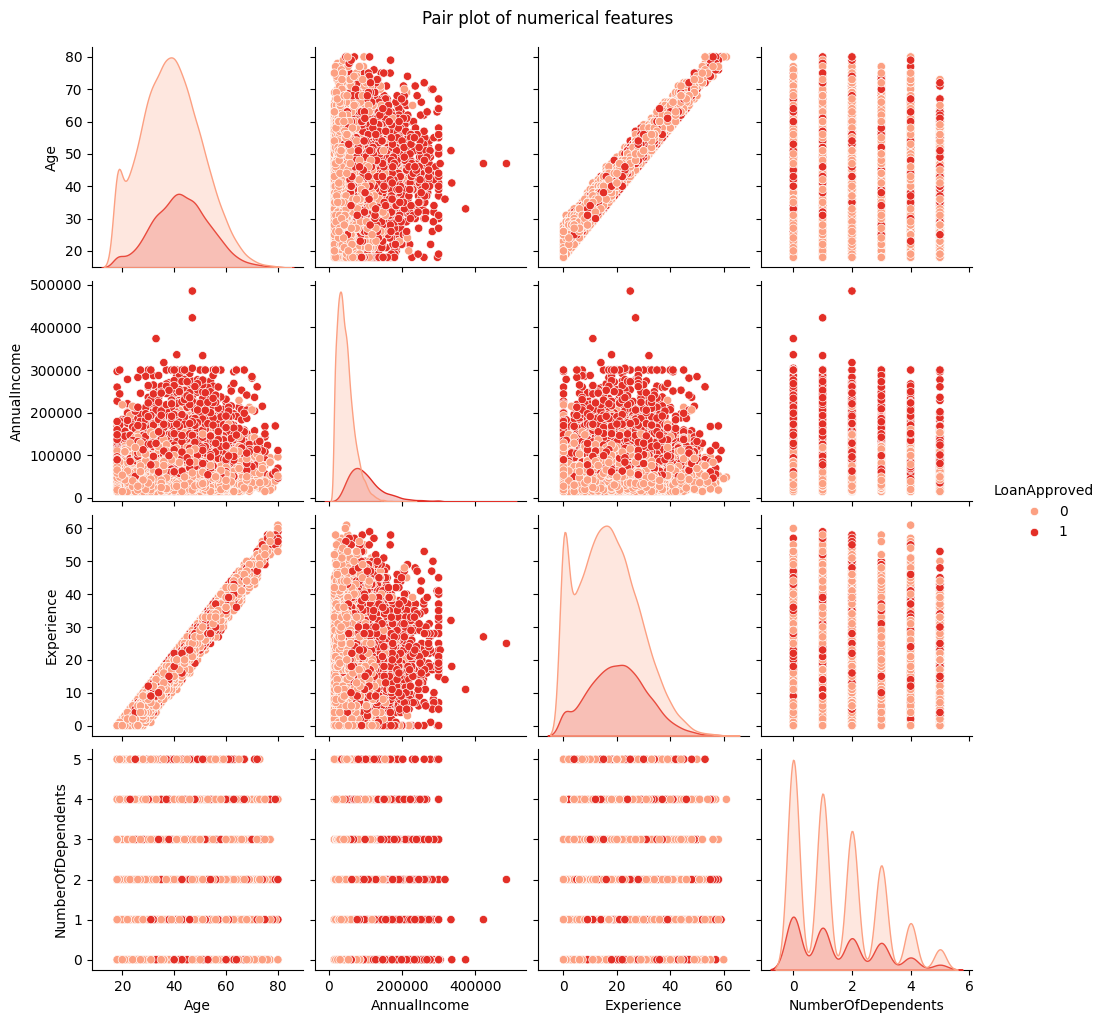

In [95]:
sns.pairplot(df[['Age','AnnualIncome','Experience','NumberOfDependents','LoanApproved']],hue='LoanApproved',palette='Reds')
plt.suptitle('Pair plot of numerical features',y=1.02)
plt.show()

In [96]:
df.columns

Index(['ApplicationDate', 'Age', 'AnnualIncome', 'CreditScore',
       'EmploymentStatus', 'EducationLevel', 'Experience', 'LoanAmount',
       'LoanDuration', 'MaritalStatus', 'NumberOfDependents',
       'HomeOwnershipStatus', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'LoanPurpose', 'PreviousLoanDefaults', 'PaymentHistory',
       'LengthOfCreditHistory', 'SavingsAccountBalance',
       'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities',
       'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth',
       'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment',
       'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore'],
      dtype='object')

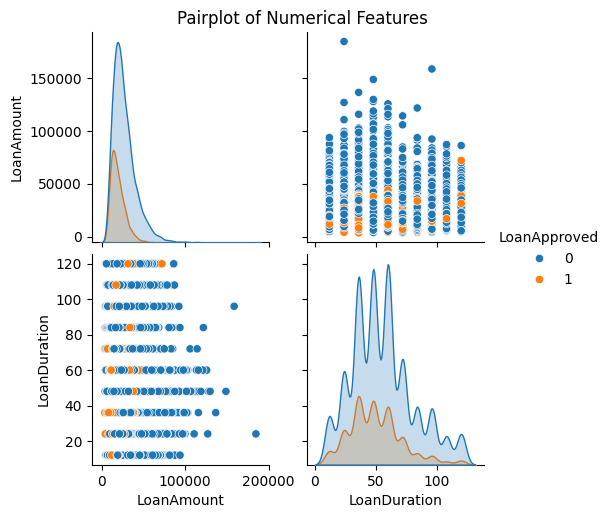

In [97]:
sns.pairplot(df[[ 'LoanAmount','LoanDuration','LoanApproved']],hue='LoanApproved')
plt.suptitle('Pairplot of Numerical Features',y=1.02)
plt.show()

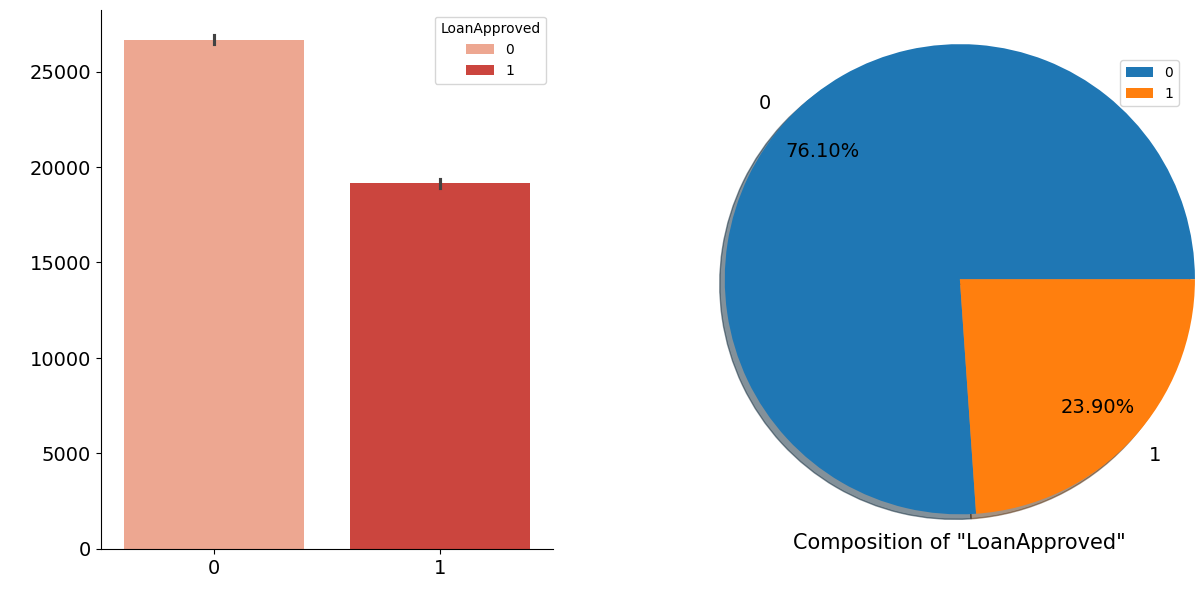

In [98]:
plt.figure(figsize=(14,7))
ax1=plt.subplot(1,2,1)
cp=sns.barplot(x='LoanApproved',y='LoanAmount',data=df,palette='Reds',hue='LoanApproved')
ax1.set_xlabel(" ")
ax1.set_ylabel(" ")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True,right=True)
ax2=plt.subplot(1,2,2)
plt.pie(x=df['LoanApproved'].value_counts(),
        labels=list(df['LoanApproved'].unique()),
        autopct='%2.2f%%',
        pctdistance=0.8,
        shadow=True,
        radius=1.3,
        textprops={'fontsize':14})
plt.legend()
ax1.set_xlabel(" ")
plt.xlabel('Composition of "LoanApproved"',fontsize=15,labelpad=20)
plt.subplots_adjust(wspace=0.4)
plt.show()





In [99]:
df.isnull().sum().sum()# to get count of all the null values from the dataframe
df.duplicated().sum()#to get the duplicated rows

np.int64(0)

In [100]:
df.columns

Index(['ApplicationDate', 'Age', 'AnnualIncome', 'CreditScore',
       'EmploymentStatus', 'EducationLevel', 'Experience', 'LoanAmount',
       'LoanDuration', 'MaritalStatus', 'NumberOfDependents',
       'HomeOwnershipStatus', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'LoanPurpose', 'PreviousLoanDefaults', 'PaymentHistory',
       'LengthOfCreditHistory', 'SavingsAccountBalance',
       'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities',
       'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth',
       'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment',
       'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore'],
      dtype='object')

# Feature Engineering

In [101]:
df['BankBalance']=df['SavingsAccountBalance']+df['CheckingAccountBalance']
df.drop('SavingsAccountBalance',axis=1,inplace=True)
df.drop('CheckingAccountBalance',axis=1,inplace=True)
df.columns

Index(['ApplicationDate', 'Age', 'AnnualIncome', 'CreditScore',
       'EmploymentStatus', 'EducationLevel', 'Experience', 'LoanAmount',
       'LoanDuration', 'MaritalStatus', 'NumberOfDependents',
       'HomeOwnershipStatus', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'LoanPurpose', 'PreviousLoanDefaults', 'PaymentHistory',
       'LengthOfCreditHistory', 'TotalAssets', 'TotalLiabilities',
       'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth',
       'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment',
       'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore', 'BankBalance'],
      dtype='object')

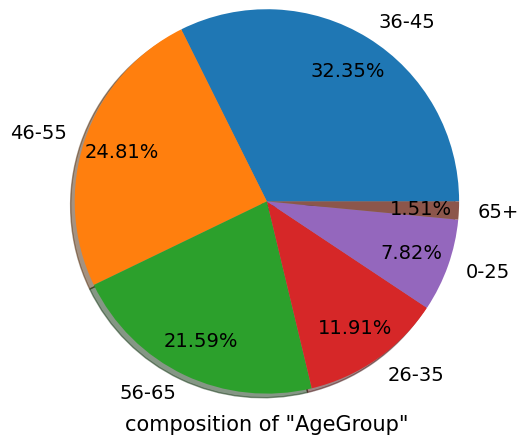

In [102]:
df['AgeGroup']=pd.cut(df['Age'],bins=[0,25,35,45,55,65,100],labels=['0-25','26-35','36-45','46-55','56-65','65+'])
plt.pie(x=df['AgeGroup'].value_counts(),labels=list(df['AgeGroup'].unique()),autopct='%2.2f%%',pctdistance=0.8,shadow=True,radius=1.3,textprops={'fontsize':14})
plt.xlabel('composition of "AgeGroup"',fontsize=15,labelpad=20)
plt.show()

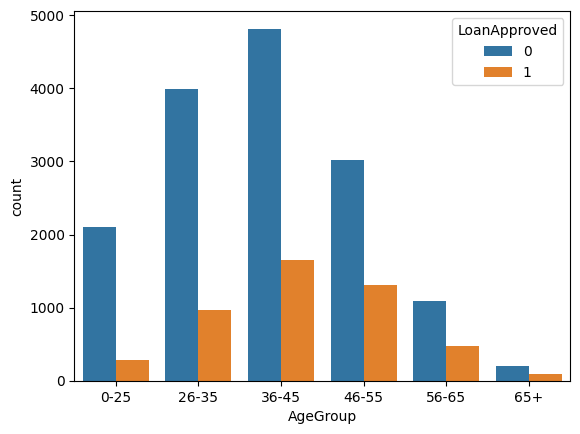

In [103]:
sns.countplot(data=df,x='AgeGroup',hue='LoanApproved')
plt.show()

In [104]:
df.drop('AgeGroup',axis=1,inplace=True)

In [105]:
df[['year','month','day']]=df['ApplicationDate'].str.split('-',expand=True)
df['year']=df['year'].astype(int)
df['month']=df['month'].astype(int)
df['day']=df['day'].astype(int)
df[['ApplicationDate','year','month','day']]

,ApplicationDate,year,month,day
0,2018-01-01,2018,1,1
1,2018-01-02,2018,1,2
2,2018-01-03,2018,1,3
3,2018-01-04,2018,1,4
4,2018-01-05,2018,1,5
...,...,...,...,...
19995,2072-09-29,2072,9,29
19996,2072-09-30,2072,9,30
19997,2072-10-01,2072,10,1
19998,2072-10-02,2072,10,2


In [106]:
df.drop(['ApplicationDate','year','month','day'],axis=1,inplace=True)

# Encoding

In [107]:
categorical_columns=df.select_dtypes(include=['object','category']).columns
print('Categorical Columns:', categorical_columns)

Categorical Columns: Index(['EmploymentStatus', 'EducationLevel', 'MaritalStatus',
       'HomeOwnershipStatus', 'LoanPurpose'],
      dtype='object')


## Ordinal Data

In [108]:
df['EmploymentStatus'].unique()

array(['Employed', 'Self-Employed', 'Unemployed'], dtype=object)

In [109]:
df['EmploymentStatus']=df['EmploymentStatus'].map({'Unemployed':0,'Self-Employed':1,'Employed':2})

In [110]:
df['EducationLevel'].unique()

array(['Master', 'Associate', 'Bachelor', 'High School', 'Doctorate'],
      dtype=object)

In [111]:
from sklearn.preprocessing import OrdinalEncoder

In [112]:
oe_education=OrdinalEncoder()

In [113]:
df['EducationLevel']=df['EducationLevel'].map({'High School':0,'Associate':1,'Bachelor':2,'Master':3,'Doctorate':4})

In [114]:
df

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore,BankBalance
0,45,39948,617,2,3,22,13152,48,Married,2,...,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0,8834
1,38,39709,628,2,1,15,26045,48,Single,1,...,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0,8087
2,47,40724,570,2,2,26,17627,36,Married,2,...,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0,1781
3,58,69084,545,2,0,34,37898,96,Single,1,...,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0,2892
4,37,103264,594,2,1,17,9184,36,Married,1,...,0.941369,5,227019,0.197184,0.175990,330.179141,0.070210,1,36.0,6536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,44,30180,587,2,0,19,24521,36,Married,3,...,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0,3664
19996,56,49246,567,2,1,33,25818,36,Married,5,...,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0,7093
19997,44,48958,645,2,2,20,37033,72,Married,3,...,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,45.0,2921
19998,60,41025,560,2,0,36,14760,72,Married,3,...,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,59.0,3297


In [115]:
df['HomeOwnershipStatus'].unique()

array(['Own', 'Mortgage', 'Rent', 'Other'], dtype=object)

In [116]:
df['HomeOwnershipStatus']=df['HomeOwnershipStatus'].map({'Rent':0,'Mortgage':1,'Own':2,'Other':3})

In [117]:
# for preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder #for encoding object values

## Nominal Data

In [118]:
df.columns

Index(['Age', 'AnnualIncome', 'CreditScore', 'EmploymentStatus',
       'EducationLevel', 'Experience', 'LoanAmount', 'LoanDuration',
       'MaritalStatus', 'NumberOfDependents', 'HomeOwnershipStatus',
       'MonthlyDebtPayments', 'CreditCardUtilizationRate',
       'NumberOfOpenCreditLines', 'NumberOfCreditInquiries',
       'DebtToIncomeRatio', 'BankruptcyHistory', 'LoanPurpose',
       'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory',
       'TotalAssets', 'TotalLiabilities', 'MonthlyIncome',
       'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth',
       'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment',
       'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore', 'BankBalance'],
      dtype='object')

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         20000 non-null  int64  
 1   AnnualIncome                20000 non-null  int64  
 2   CreditScore                 20000 non-null  int64  
 3   EmploymentStatus            20000 non-null  int64  
 4   EducationLevel              20000 non-null  int64  
 5   Experience                  20000 non-null  int64  
 6   LoanAmount                  20000 non-null  int64  
 7   LoanDuration                20000 non-null  int64  
 8   MaritalStatus               20000 non-null  object 
 9   NumberOfDependents          20000 non-null  int64  
 10  HomeOwnershipStatus         20000 non-null  int64  
 11  MonthlyDebtPayments         20000 non-null  int64  
 12  CreditCardUtilizationRate   20000 non-null  float64
 13  NumberOfOpenCreditLines     200

In [120]:
# le=LabelEncoder()
# for cols in df.select_dtypes('object').columns:
#     df[cols]=le.fit_transform(df[cols])

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         20000 non-null  int64  
 1   AnnualIncome                20000 non-null  int64  
 2   CreditScore                 20000 non-null  int64  
 3   EmploymentStatus            20000 non-null  int64  
 4   EducationLevel              20000 non-null  int64  
 5   Experience                  20000 non-null  int64  
 6   LoanAmount                  20000 non-null  int64  
 7   LoanDuration                20000 non-null  int64  
 8   MaritalStatus               20000 non-null  object 
 9   NumberOfDependents          20000 non-null  int64  
 10  HomeOwnershipStatus         20000 non-null  int64  
 11  MonthlyDebtPayments         20000 non-null  int64  
 12  CreditCardUtilizationRate   20000 non-null  float64
 13  NumberOfOpenCreditLines     200

# Data Transformation
## Skewed Data
### Histogram

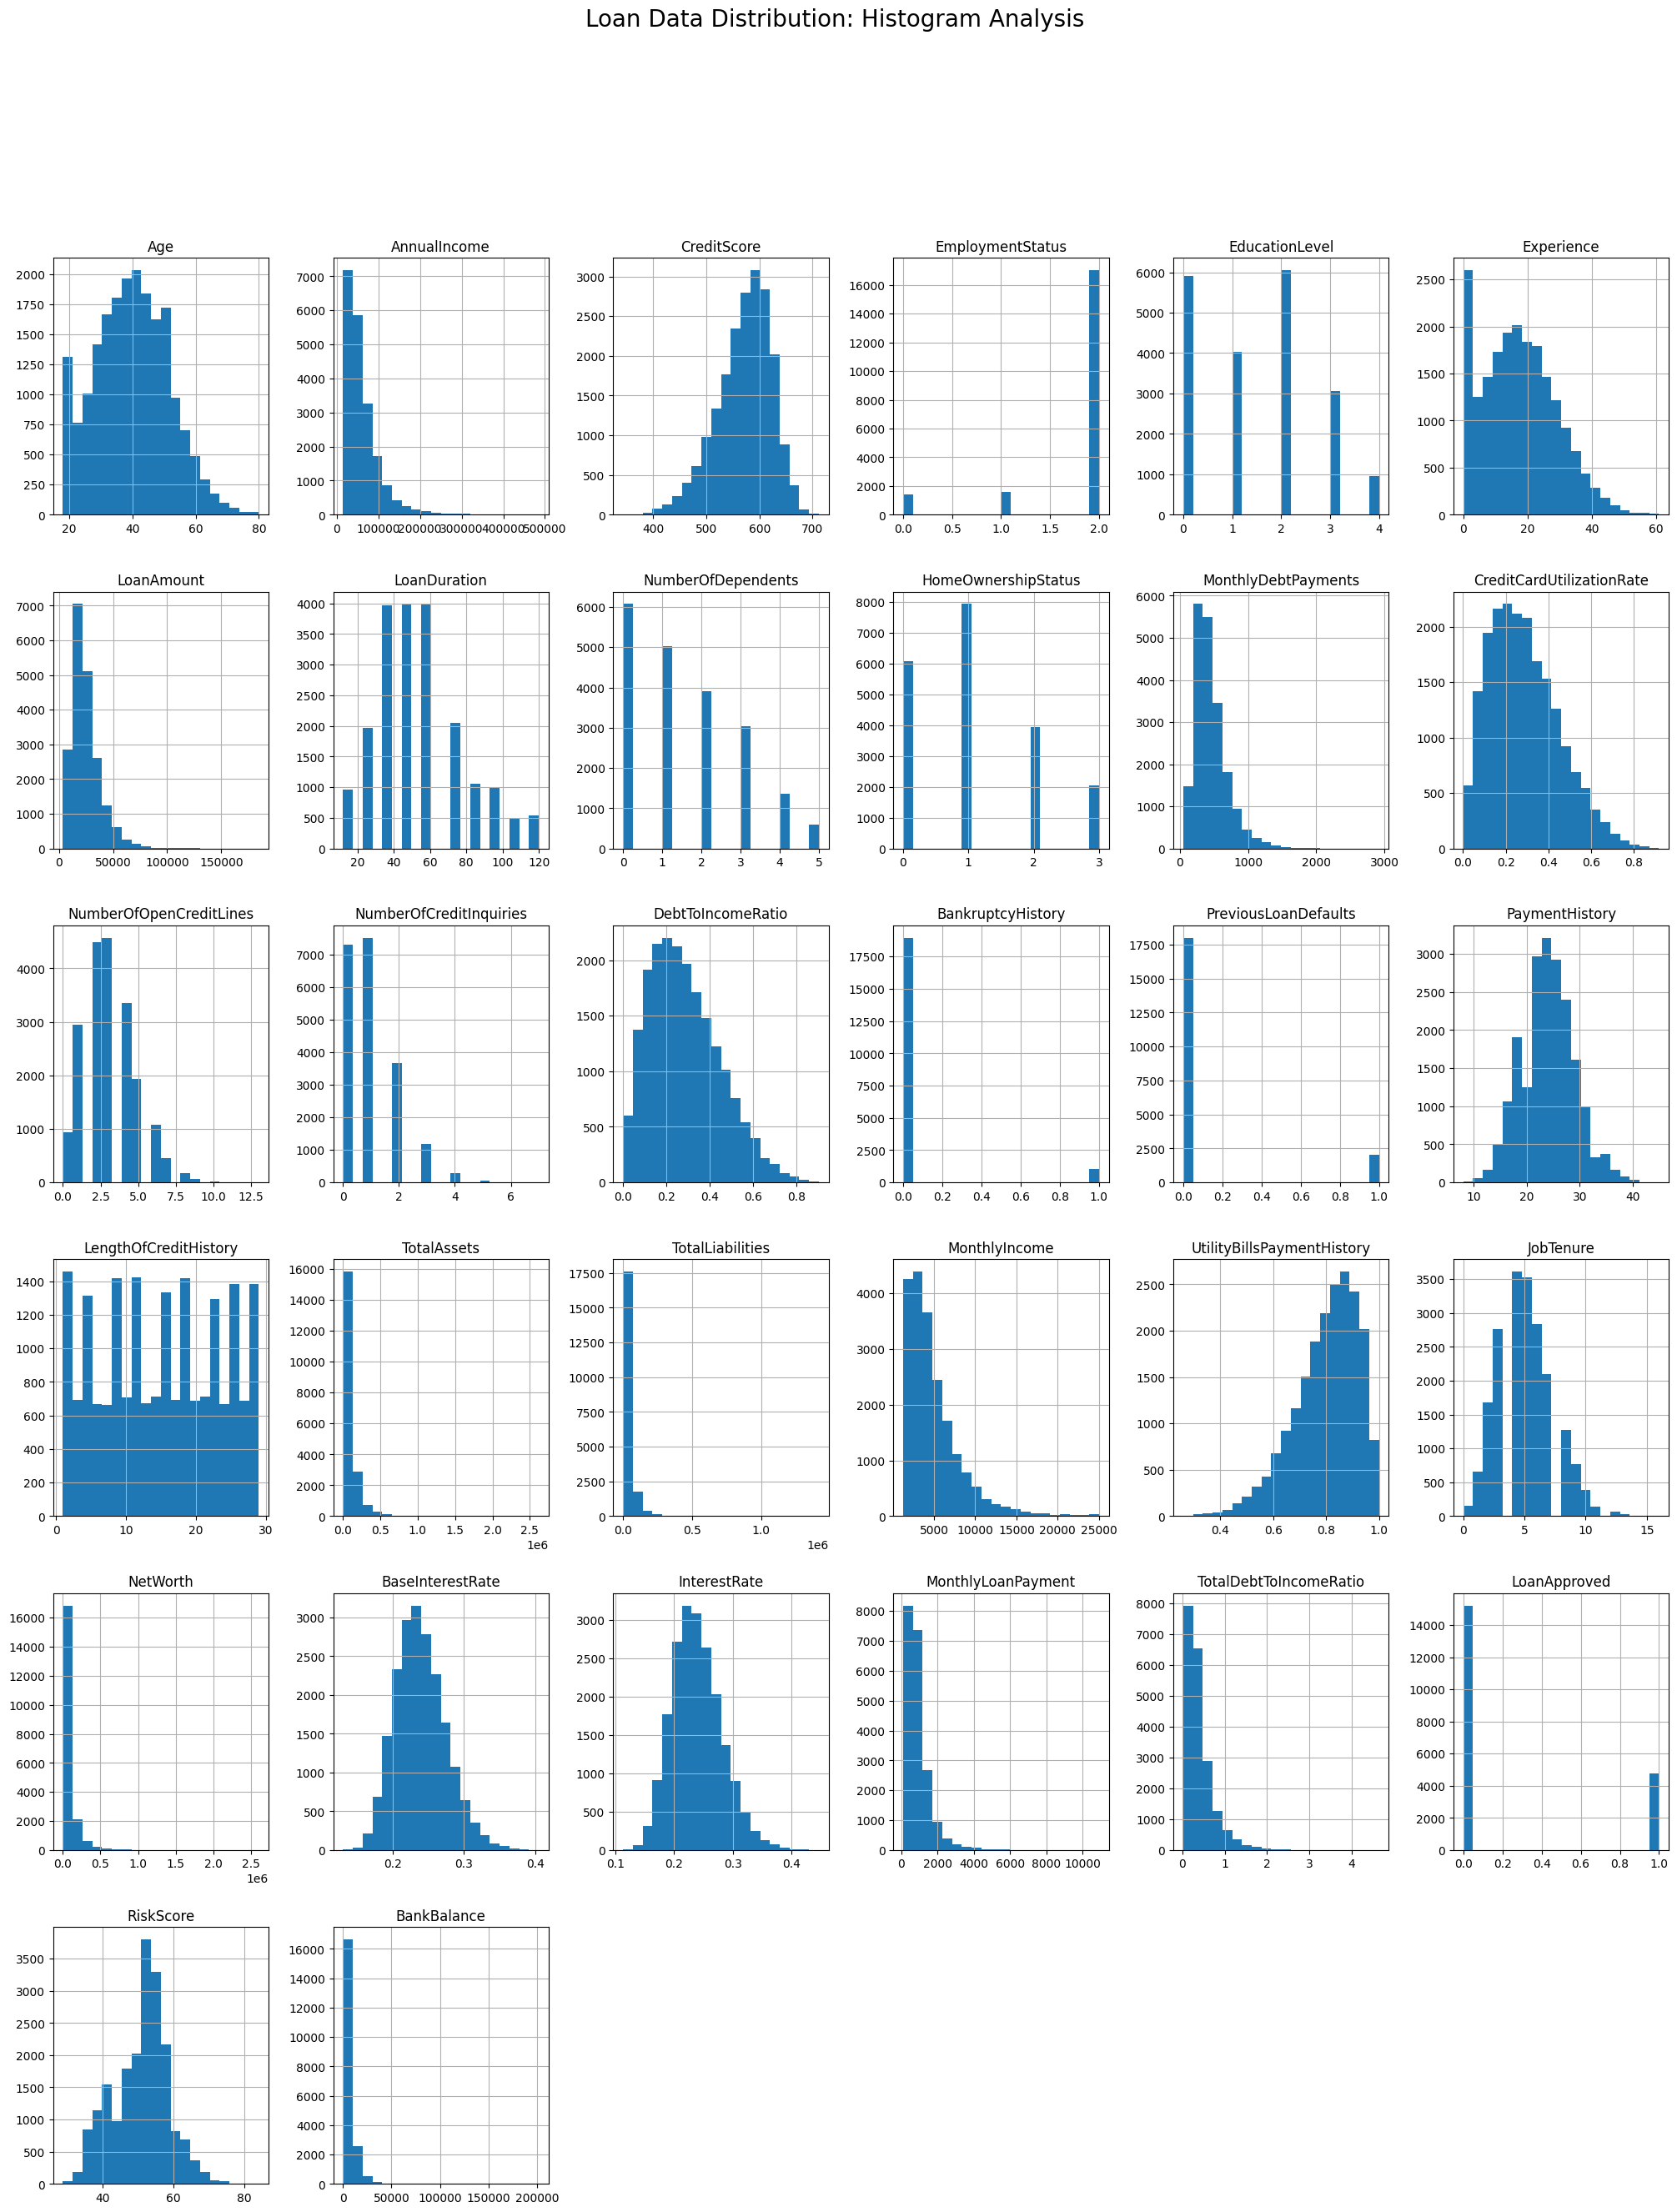

In [122]:
df.hist(bins=20,figsize=(25,30))
plt.suptitle('Loan Data Distribution: Histogram Analysis', fontsize=20)
plt.show()

In [123]:
df.drop(['PaymentHistory','EmploymentStatus','JobTenure','BankBalance','UtilityBillsPaymentHistory','NumberOfDependents','DebtToIncomeRatio','HomeOwnershipStatus','NumberOfOpenCreditLines','MaritalStatus','NumberOfCreditInquiries','LoanPurpose','CreditCardUtilizationRate','TotalLiabilities'],axis=1,inplace=True)

In [124]:
#step:1 calculate the correlation of each feature with the target
corr_with_target=df.corr()['LoanApproved'].sort_values(ascending=False)
#step2: set the threshold for low correlation (-0.05 to 0.05)
low_corr_features=corr_with_target[(corr_with_target > -0.05)&
                                   (corr_with_target < 0.05)]
#step 3: print the list of features with low correlation
print('features with correlation between -0.05 and 0.05:')
print(low_corr_features)

features with correlation between -0.05 and 0.05:
Series([], Name: LoanApproved, dtype: float64)


In [125]:
# calculate skewness for each column
skewness=df.skew()
# sort the skewness values in ascending order
sorted_skewness=skewness.sort_values(ascending=True)
# Display the sorted skewness values
print(sorted_skewness)

CreditScore              -0.596727
RiskScore                -0.162062
LengthOfCreditHistory     0.002989
Age                       0.185964
EducationLevel            0.273155
Experience                0.339981
BaseInterestRate          0.461850
InterestRate              0.485491
LoanDuration              0.651330
LoanApproved              1.224086
MonthlyDebtPayments       1.653435
LoanAmount                1.833688
MonthlyIncome             1.992929
AnnualIncome              2.088948
TotalDebtToIncomeRatio    2.574494
PreviousLoanDefaults      2.665941
MonthlyLoanPayment        3.081845
BankruptcyHistory         4.017672
TotalAssets               5.311326
NetWorth                  5.599844
dtype: float64


In [126]:
# create copy of the original data for comparison
df_copy=df.copy()
#Log transformation of skewed columns(eg,AnnualIncome,LoanAmount)
df['AnnualIncome']=np.log1p(df['AnnualIncome'])# log(1+x) to handle skewness
df['LoanAmount']=np.log1p(df['LoanAmount'])

Text(0.5, 1.0, 'Annual Income-after log transform')

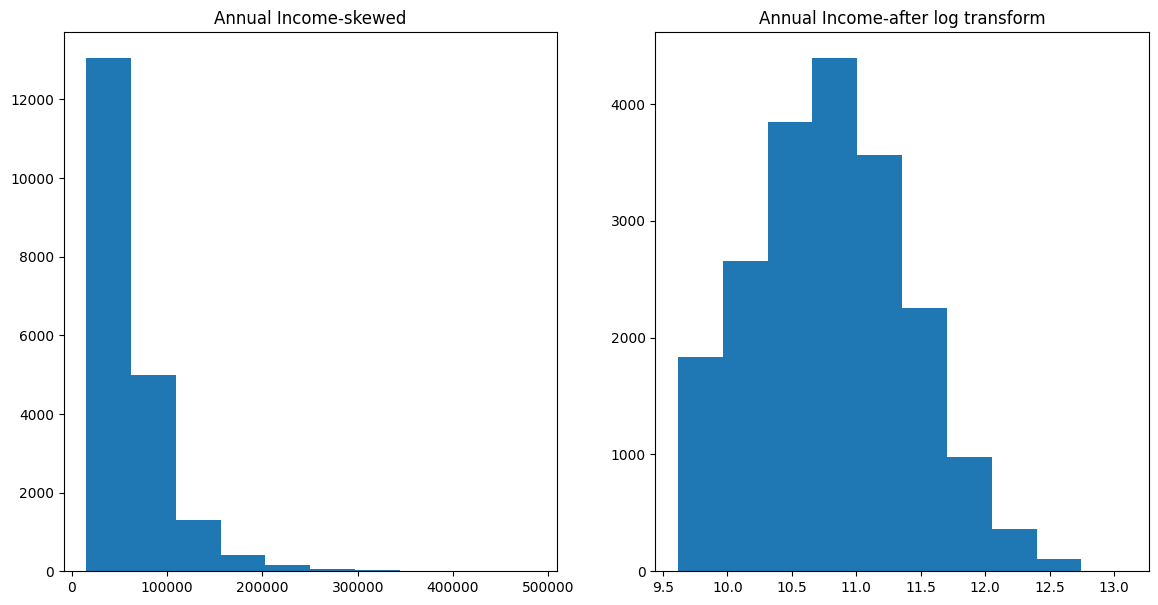

In [127]:
plt.figure(figsize=(14,7))
#
ax1=plt.subplot(1,2,1)
cp=plt.hist(df_copy['AnnualIncome'])
plt.title('Annual Income-skewed')
#
ax2=plt.subplot(1,2,2)
cp=plt.hist(df['AnnualIncome'])
plt.title('Annual Income-after log transform')

Text(0.5, 1.0, 'LoanAmount-after log transform')

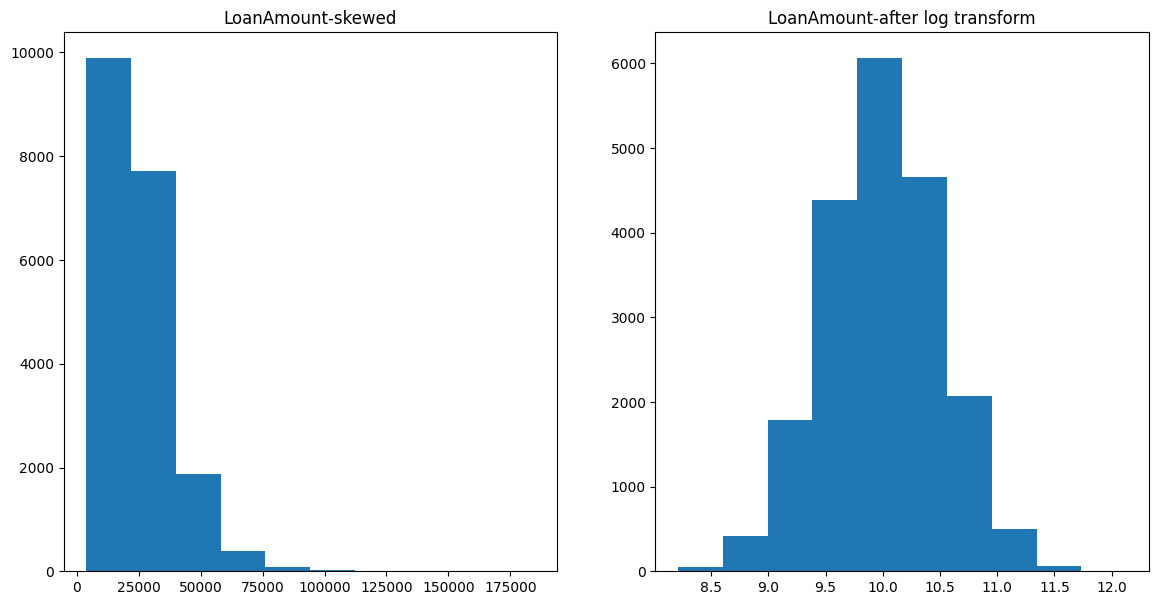

In [128]:
plt.figure(figsize=(14,7))
#
ax1=plt.subplot(1,2,1)
cp=plt.hist(df_copy['LoanAmount'])
plt.title('LoanAmount-skewed')
#
ax2=plt.subplot(1,2,2)
cp=plt.hist(df['LoanAmount'])
plt.title('LoanAmount-after log transform')

Index(['MonthlyDebtPayments', 'BankruptcyHistory', 'PreviousLoanDefaults',
       'TotalAssets', 'MonthlyIncome', 'NetWorth', 'MonthlyLoanPayment',
       'TotalDebtToIncomeRatio'],
      dtype='object')


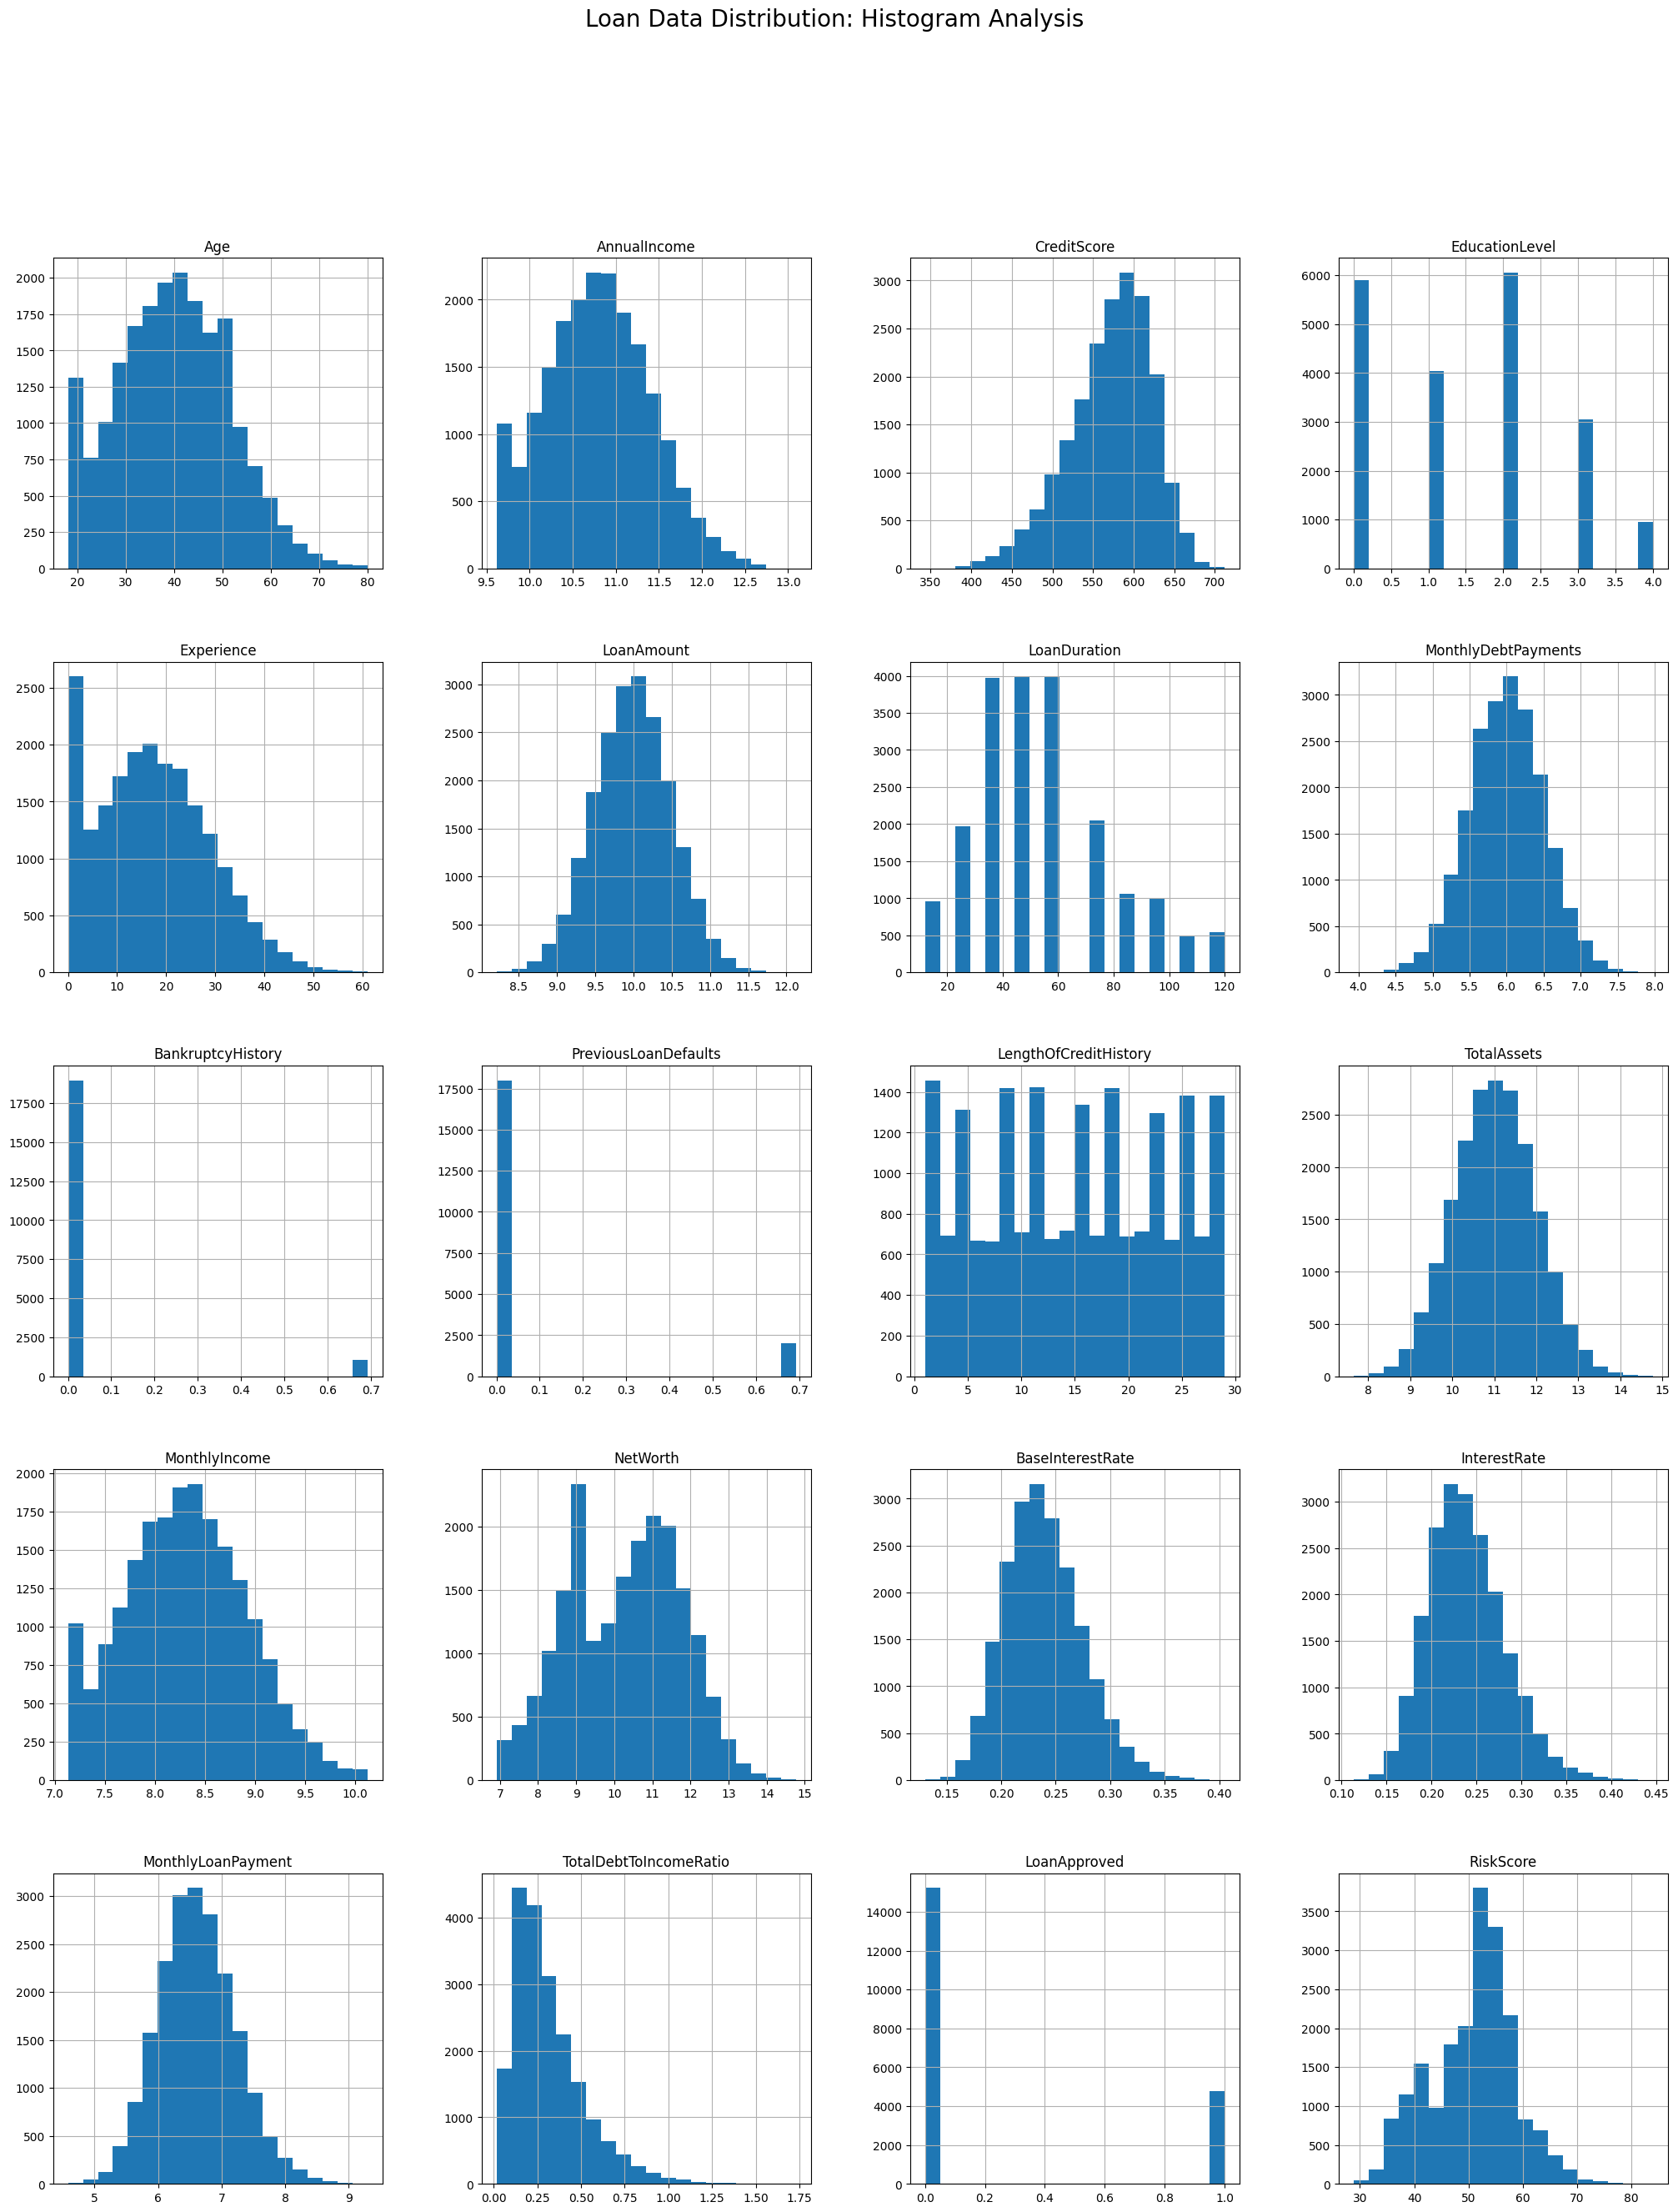

In [129]:
# step 1 :select numeric columns,excluding 'LoanApproved'
numeric_columns=df.drop(columns=['LoanApproved']).select_dtypes(include=['number'])
#step 2: Calculate skewness for numeric columns
skewness=numeric_columns.skew()
#step 3 : Identify columns with high skewness(threshold >1 or < -1)
highly_skewed_cols=skewness[abs(skewness)>1].index # for select the columns
print(highly_skewed_cols)

#step 4: apply log transformation using np.log1p() for columns with high skewness
for col in highly_skewed_cols:
    df[col]=np.log1p(df[col])# convert every columns which has high skewness
df.hist(bins=20,figsize=(25,30))
plt.suptitle('Loan Data Distribution: Histogram Analysis', fontsize=20)
plt.show()


# Correlation 

<Axes: >

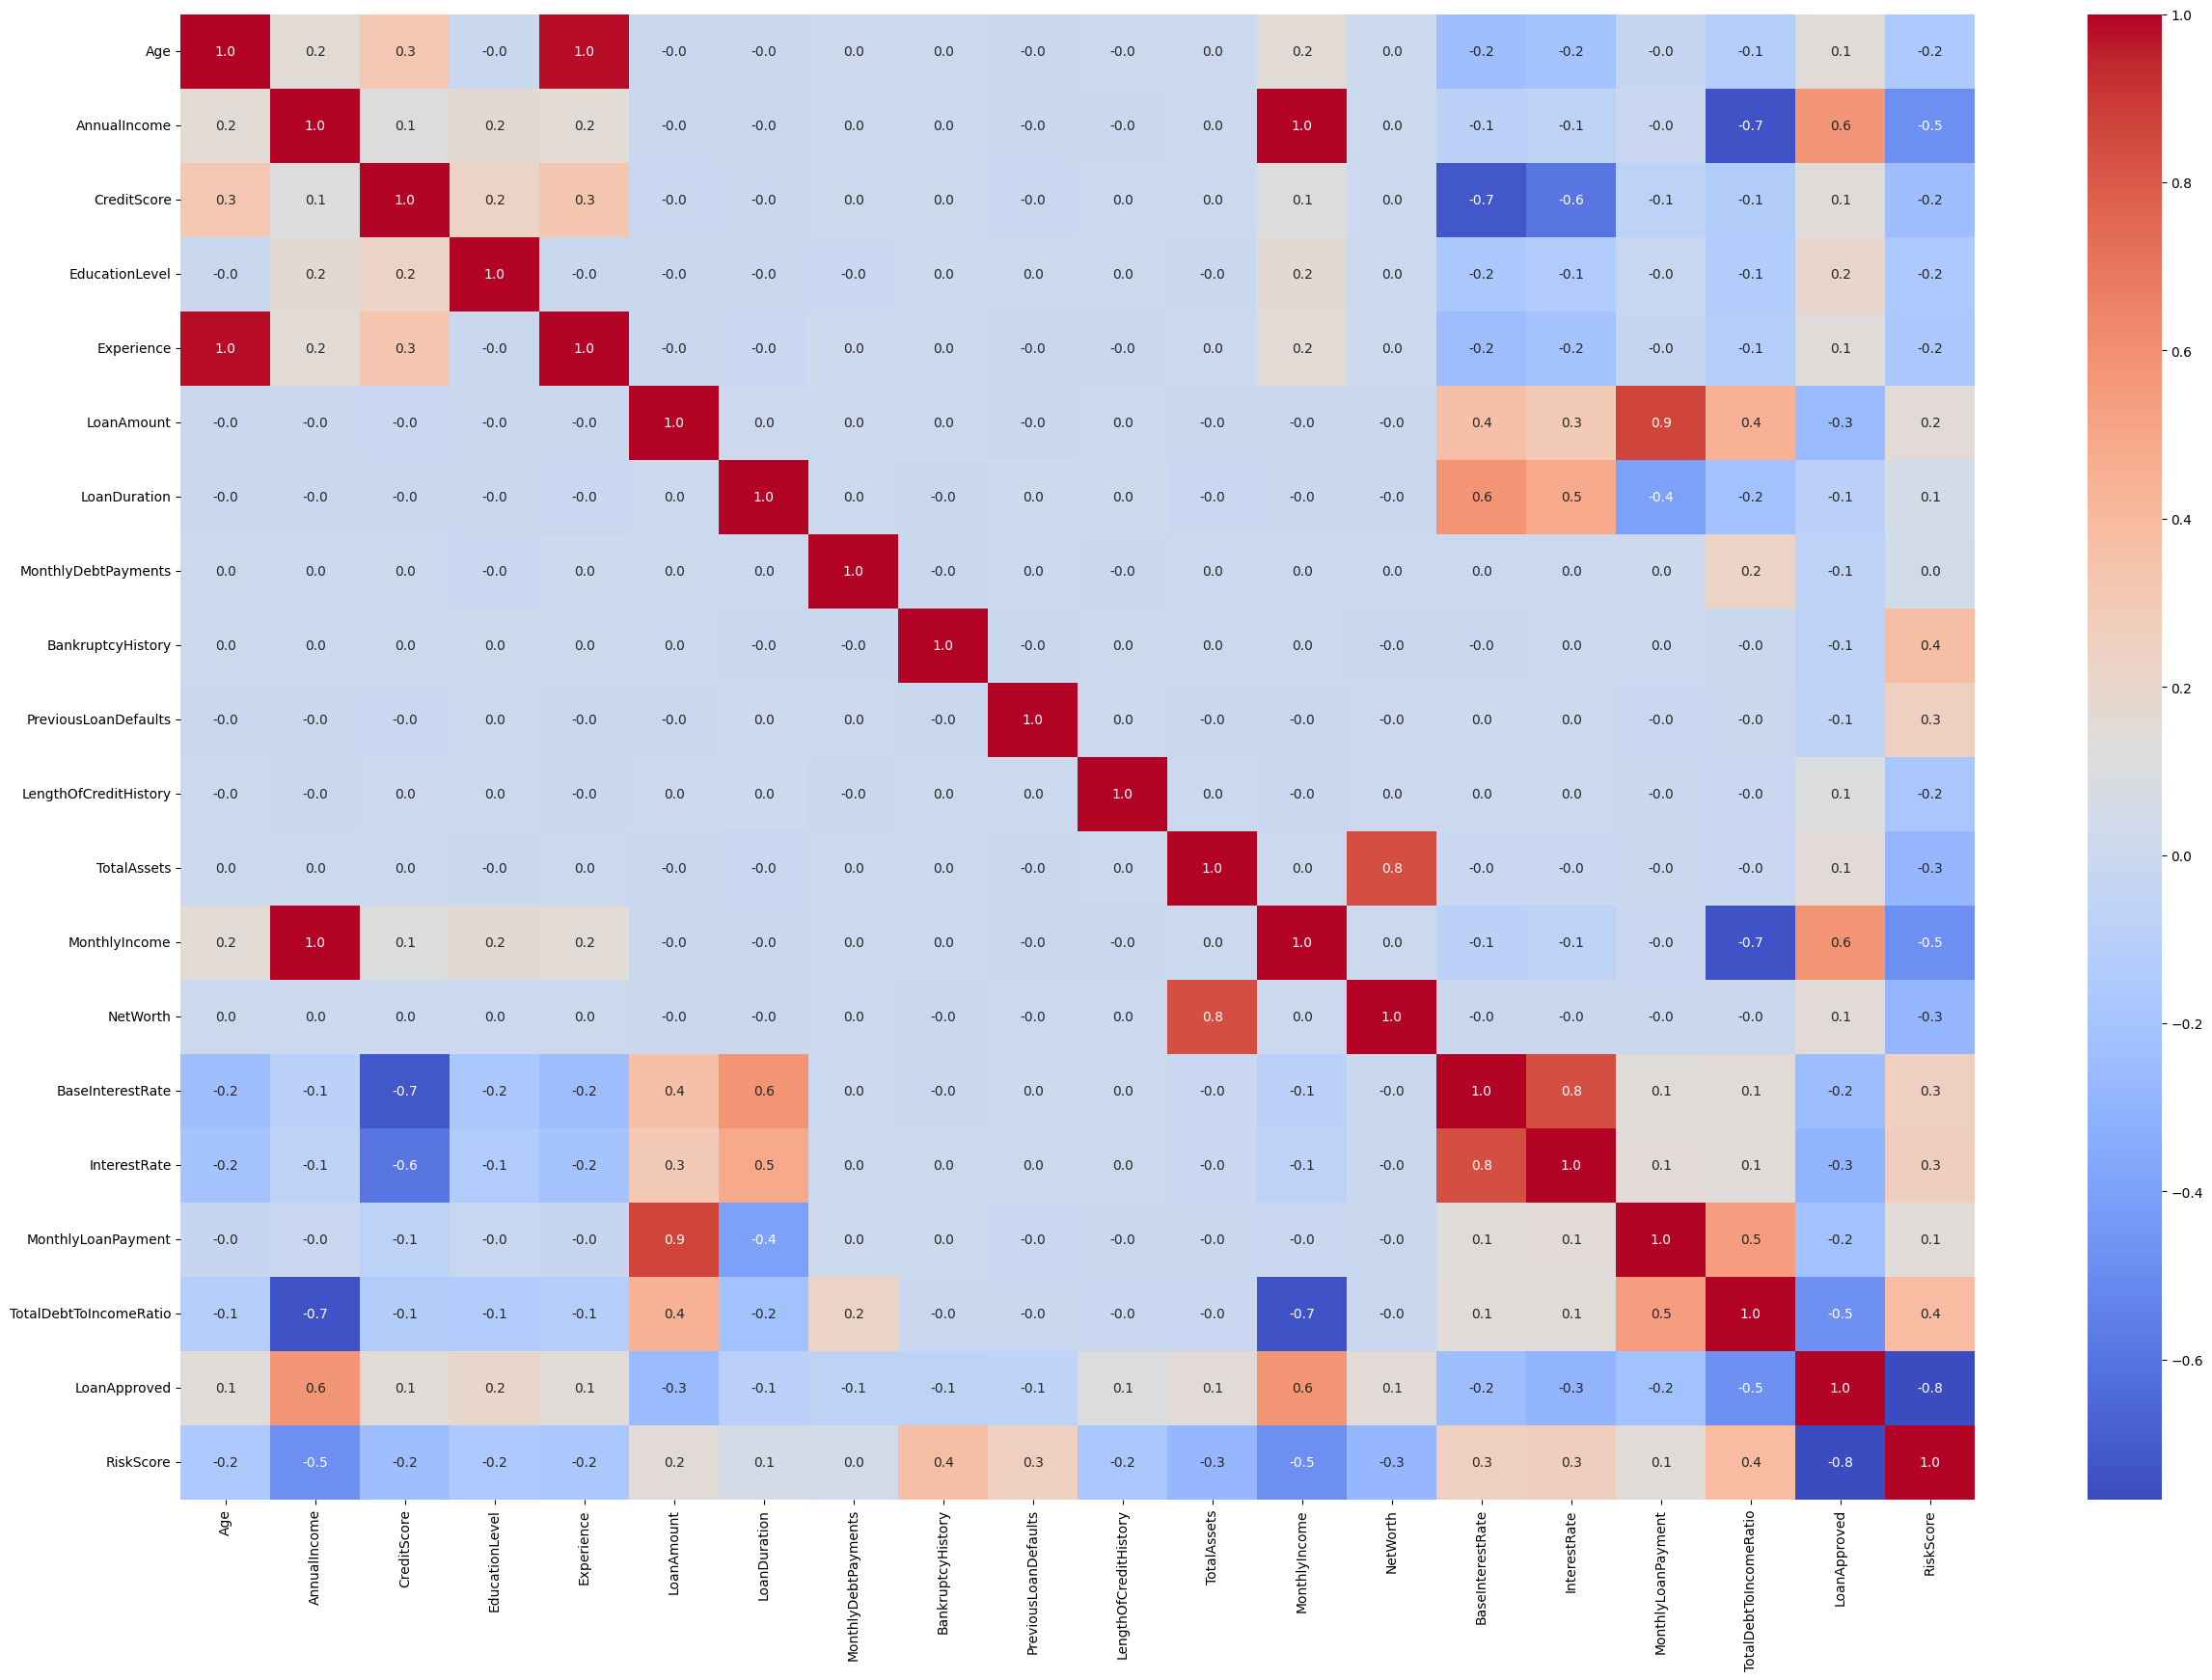

In [130]:
plt.figure(figsize=(30,20))
#
df.corr(numeric_only=True)
sns.heatmap(df.corr(numeric_only=True),annot=True, cmap='coolwarm', fmt='0.01f',annot_kws=None)

# Outliers

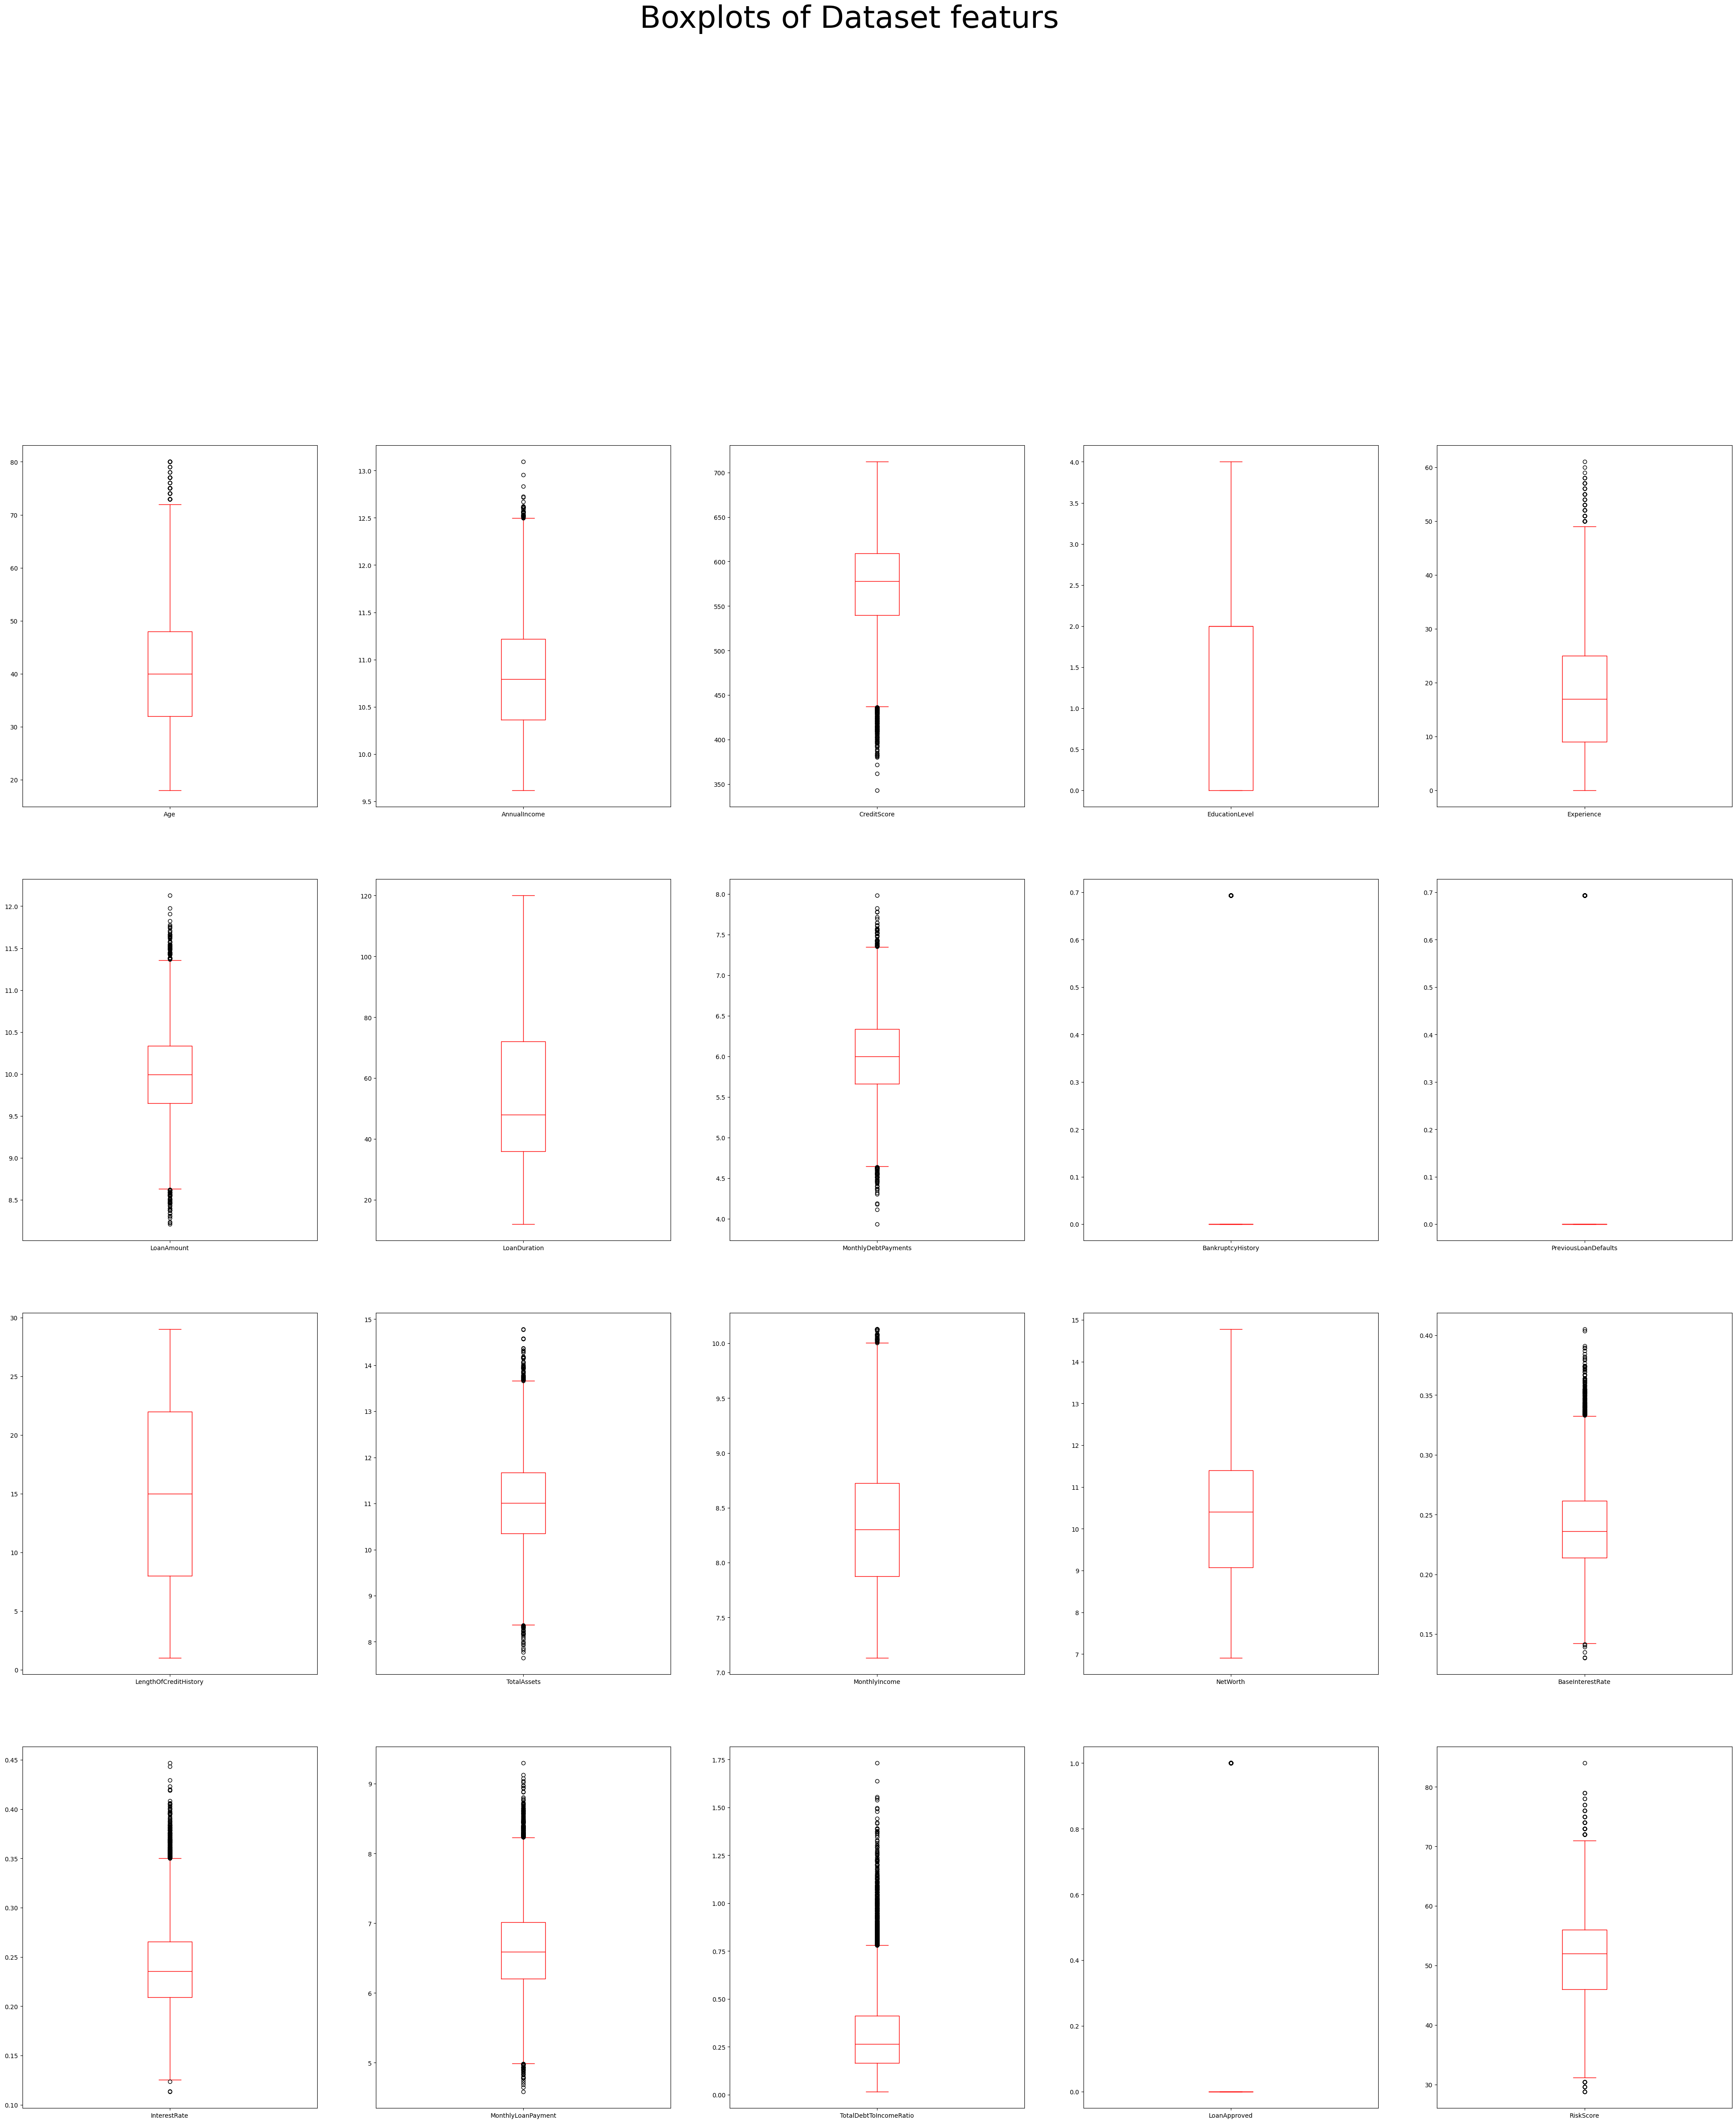

In [131]:
df.plot(kind='box',subplots=True, layout=(8,5),figsize=(50,100),color='red')
plt. suptitle('Boxplots of Dataset featurs',fontsize=50)
plt.show()

In [132]:
# create a copy of the original data for comparison
loan_df_copy=df.copy()
def remove_outliers_iqr(dataf,exclude_columns):
  #loop through numeric columns
  for column in dataf.select_dtypes(include=['number']):
    if column in exclude_columns:
      continue #skip excluded columns
    Q1=dataf[column].quantile(0.25)
    Q3=dataf[column].quantile(0.75)
    IQR=Q3-Q1
    # define outlier bounds
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    # filter out the outliers
    dataf=dataf[(dataf[column]>= lower_bound) & (dataf[column]<=upper_bound)]
  return dataf
     #define the columns to exclude
exclude_columns=['LoanApproved','RiskScore']
#remove outliers
df=remove_outliers_iqr(df,exclude_columns)
#print shapes of data before  and after removing outliers
print('Shape of data before removing outliers:',loan_df_copy.shape)
print('Shape of data after removing outliers:',df.shape)
print('Number of outliers removed:',loan_df_copy.shape[0]-df.shape[0])

Shape of data before removing outliers: (20000, 20)
Shape of data after removing outliers: (15523, 20)
Number of outliers removed: 4477


# Removing Unwanted features


## Based on correlation

In [133]:
df.columns

Index(['Age', 'AnnualIncome', 'CreditScore', 'EducationLevel', 'Experience',
       'LoanAmount', 'LoanDuration', 'MonthlyDebtPayments',
       'BankruptcyHistory', 'PreviousLoanDefaults', 'LengthOfCreditHistory',
       'TotalAssets', 'MonthlyIncome', 'NetWorth', 'BaseInterestRate',
       'InterestRate', 'MonthlyLoanPayment', 'TotalDebtToIncomeRatio',
       'LoanApproved', 'RiskScore'],
      dtype='object')

In [134]:
correlation_matrix=df.corr()
#set the correlation threshold
threshold=0.5
#find pairs of features with high correlation
highly_correlated_pairs=[]
for i in range(len(correlation_matrix.columns)):
  for j in range(i):
    #check if the absolute correlation exceeds the threshold
    if abs(correlation_matrix.iloc[i,j])>threshold:
      highly_correlated_pairs.append((correlation_matrix.columns[i],correlation_matrix.columns[j]))
      #print all pairs of highly correlated features
print(highly_correlated_pairs)

[('Experience', 'Age'), ('MonthlyIncome', 'AnnualIncome'), ('NetWorth', 'TotalAssets'), ('BaseInterestRate', 'CreditScore'), ('BaseInterestRate', 'LoanDuration'), ('InterestRate', 'CreditScore'), ('InterestRate', 'BaseInterestRate'), ('MonthlyLoanPayment', 'LoanAmount'), ('TotalDebtToIncomeRatio', 'AnnualIncome'), ('TotalDebtToIncomeRatio', 'MonthlyIncome'), ('LoanApproved', 'AnnualIncome'), ('LoanApproved', 'MonthlyIncome'), ('LoanApproved', 'TotalDebtToIncomeRatio'), ('RiskScore', 'AnnualIncome'), ('RiskScore', 'MonthlyIncome'), ('RiskScore', 'LoanApproved')]


In [135]:
df.columns

Index(['Age', 'AnnualIncome', 'CreditScore', 'EducationLevel', 'Experience',
       'LoanAmount', 'LoanDuration', 'MonthlyDebtPayments',
       'BankruptcyHistory', 'PreviousLoanDefaults', 'LengthOfCreditHistory',
       'TotalAssets', 'MonthlyIncome', 'NetWorth', 'BaseInterestRate',
       'InterestRate', 'MonthlyLoanPayment', 'TotalDebtToIncomeRatio',
       'LoanApproved', 'RiskScore'],
      dtype='object')

The goal is to retain features that are strongly correlated with the target variable(either positively or negatively) and remove those that have little or no relationship



In [136]:
#step 1: Calculate the correlation of each features with target
corr_with_target=df.corr()['RiskScore'].sort_values(ascending=False)
corr_with_target
#step2: lset the threshold for low correlation (-0.05 to 0.05)
low_corr_features=corr_with_target[(corr_with_target > -0.05)&
                                   (corr_with_target < 0.05)]
#step 3: print the list of features with low correlation
print('features with correlation between -0.05 and 0.05:')
print(low_corr_features)

features with correlation between -0.05 and 0.05:
MonthlyDebtPayments    0.030642
Name: RiskScore, dtype: float64


# Outliers

# PCA

PCA reduces the number of features(dimensions) in a dataset.
> principal components: these are the new features created by PCA. each principal component is a linear combination of the original features, and they are ranked based on the amount of variance they explain in the data.

In [137]:
from sklearn.decomposition import PCA
#apply PCA
pca=PCA(n_components=5) # you can change the number of components to retain
loan_pca=pca.fit_transform(df)
#create a dataframe with the PCA results
loan_pca_df=pd.DataFrame(loan_pca,columns=[f'PC{i+1}' for i in range(loan_pca.shape[1])])
#step 5: combine the PCA components with the original DataFrame if needed
loan_pca_final_df=pd.concat([df.reset_index(drop=True),loan_pca_df],axis=1)
# now loan_pca_final_df contains the original data along with the PCA components
loan_pca_df.head()

,PC1,PC2,PC3,PC4,PC5
0,42.410583,-7.161778,1.699108,-6.174605,-0.752031
1,52.060077,-7.165242,-9.550725,-7.248977,2.014532
2,-4.133339,-18.089268,11.070201,5.208764,6.232142
3,-26.096087,42.167128,28.088476,-6.329806,1.810536
4,18.808075,-18.773995,-4.144927,15.882466,-7.083282


## Scaling
> Standardisation and normalization are two common techniques used in data preprocessing to scale features.
### Standardisation:
> Standardisation transforms data to have  a mean of 0 and a standard deviation of 1.This is done by substracting the mean of the data and dividing by the standard deviation
$$ x'=\frac{x-\mu}{\sigma} $$
> Standardization is useful when your data follows a normal distribution or if using machine learning algorithms that assume normally distributed data (eg., linear regression, logistic regression,SVM etc).It works well with algorithms that rely on the distance between data points(eg. K-NN,PCA)

### MinMaxScaler
>  normalisation transforms data to a specific range ,usually[0,1] or [-1,1].the idea is to rescale the data without distorting the differences in the ranges of values.
$$ x'=\frac{x-min(x)}{max(x)-min(x)} $$
> Normalisation is preferred  when you know that the data does not follow a normal distribution and when you need to constrain the data within a fixed range.It is commonly used in algorithms such as neural networks and k means clustering , where the magnitude of the data matters.


In [138]:
df.shape

(15523, 20)

## Handling Outliers
### Boxplot

## Model Training and Evaluation
### Classification Modeling
> Binary Loan Approval Classification : To determine the binary outcome of loan approval,indicating whether an applicant is likely to be approved or denied for a loan

In [139]:
#convert 'LoanApproved' from float to int
# df['LoanApproved']=df['LoanApproved'].astype(int)
x=df.drop(['LoanApproved','RiskScore'],axis=1)
y=df[['LoanApproved']]

In [140]:
df[['LoanApproved']].value_counts()

LoanApproved
0               11403
1                4120
Name: count, dtype: int64

In [141]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
print('Shape of training features:',x_train.shape)
print('Shape of testing features:',x_test.shape)
print('Shape of training target:',y_train.shape)
print('Shape of training target:',y_test.shape)

Shape of training features: (12418, 18)
Shape of testing features: (3105, 18)
Shape of training target: (12418, 1)
Shape of training target: (3105, 1)


In [142]:
# # Initialize the standardscalar
# scaler=StandardScaler()
# #apply the scalar only to the numeric columns
# x_train=scaler.fit_transform(x_train)


In [143]:
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
# Accuracy
acc=accuracy_score(y_test,y_pred)
print('Accuracy:',acc)
# confusion Matrix
print("\nConfusion matrix:\n",confusion_matrix(y_test,y_pred))
#Detailed classification report
print("\n Classification report:\n",classification_report(y_test,y_pred))

Accuracy: 0.8908212560386474

Confusion matrix:
 [[2113  127]
 [ 212  653]]

 Classification report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.93      2240
           1       0.84      0.75      0.79       865

    accuracy                           0.89      3105
   macro avg       0.87      0.85      0.86      3105
weighted avg       0.89      0.89      0.89      3105



c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [144]:
clas_models={'lr':LogisticRegression(max_iter=500),
             'rfc':RandomForestClassifier(),
             'dtc':DecisionTreeClassifier(),
             'knn':KNeighborsClassifier(n_neighbors=11),
             'svm':SVC(kernel='linear'),
             'gbc':GradientBoostingClassifier(random_state=0,learning_rate=0.45),
             'etc':ExtraTreesClassifier(),
             'nb':GaussianNB()}

In [145]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
#Dictionary to store results
results={'Model':[],'Accuracy':[],'Precision':[],'Recall':[],'F1_Score':[]}
# Evaluate each model
for model_name,model in clas_models.items():
  #train the model
  model.fit(x_train,y_train)
  model_pred=model.predict(x_test)
  #Calculate metrics
  accuracy=accuracy_score(y_test,model_pred)
  precision=precision_score(y_test,model_pred)
  recall=recall_score(y_test,model_pred)
  f1=f1_score(y_test,model_pred)
  #Store results in the dictionary
  results['Model'].append(model)
  results['Accuracy'].append(accuracy)
  results['Precision'].append(precision)
  results['Recall'].append(recall)
  results['F1_Score'].append(f1)
#Convert results to a DataFrame
results_df=pd.DataFrame(results)
# Display the results in a table
results_df

c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:

,Model,Accuracy,Precision,Recall,F1_Score
0,LogisticRegression(max_iter=500),0.909179,0.870394,0.791908,0.829298
1,"(DecisionTreeClassifier(max_features='sqrt', r...",0.933655,0.918679,0.835838,0.875303
2,DecisionTreeClassifier(),0.897262,0.829710,0.794220,0.811577
3,KNeighborsClassifier(n_neighbors=11),0.722061,0.504310,0.135260,0.213309
4,SVC(kernel='linear'),0.929469,0.893902,0.847399,0.870030
5,([DecisionTreeRegressor(criterion='friedman_ms...,0.951047,0.930036,0.891329,0.910272
6,"(ExtraTreeClassifier(random_state=170145065), ...",0.927536,0.922164,0.808092,0.861368
7,GaussianNB(),0.896618,0.774194,0.887861,0.827141


### Classification on Scaled Data



In [146]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15523 entries, 0 to 19999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     15523 non-null  int64  
 1   AnnualIncome            15523 non-null  float64
 2   CreditScore             15523 non-null  int64  
 3   EducationLevel          15523 non-null  int64  
 4   Experience              15523 non-null  int64  
 5   LoanAmount              15523 non-null  float64
 6   LoanDuration            15523 non-null  int64  
 7   MonthlyDebtPayments     15523 non-null  float64
 8   BankruptcyHistory       15523 non-null  float64
 9   PreviousLoanDefaults    15523 non-null  float64
 10  LengthOfCreditHistory   15523 non-null  int64  
 11  TotalAssets             15523 non-null  float64
 12  MonthlyIncome           15523 non-null  float64
 13  NetWorth                15523 non-null  float64
 14  BaseInterestRate        15523 non-null  flo

In [147]:
x.columns

Index(['Age', 'AnnualIncome', 'CreditScore', 'EducationLevel', 'Experience',
       'LoanAmount', 'LoanDuration', 'MonthlyDebtPayments',
       'BankruptcyHistory', 'PreviousLoanDefaults', 'LengthOfCreditHistory',
       'TotalAssets', 'MonthlyIncome', 'NetWorth', 'BaseInterestRate',
       'InterestRate', 'MonthlyLoanPayment', 'TotalDebtToIncomeRatio'],
      dtype='object')

## Regression Model

In [148]:
x1=df.drop(['LoanApproved','RiskScore'],axis=1)
y1=df[['RiskScore']]
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,random_state=42,test_size=0.2)
print('Shape of training features:',x1_train.shape)
print('Shape of testing features:',x1_test.shape)
print('Shape of training target:',y1_train.shape)
print('Shape of training target:',y1_test.shape)


Shape of training features: (12418, 18)
Shape of testing features: (3105, 18)
Shape of training target: (12418, 1)
Shape of training target: (3105, 1)


In [149]:
# # Initialize the standardscalar
# scaler=StandardScaler()
# #apply the scalar only to the numeric columns
# x1_train=scaler.fit_transform(x1_train)

In [150]:
models={"Linear_regression":LinearRegression(),
        "RandomForesr_Regressor":RandomForestRegressor(),
        "GradientBoosting_Regressor":GradientBoostingRegressor(),
        "DecisionTree_Regressor":DecisionTreeRegressor(),
        "SVM":SVR(),
        "AdaBoostRegressor":AdaBoostRegressor(),
        "ExtraTreesRegressor":ExtraTreesRegressor(),
        "BaggingRegressor":BaggingRegressor(),
        "LGBMRegressor":LGBMRegressor(),
        "XGBRegressor":XGBRegressor()
        }

In [151]:
#Dictionary to store results
results={'Model':[],'MSE':[],'MAE':[],'R2':[]}
#loop through the models,train them,and calculate the metrics
for model_name,model in models.items():
  #train the model
  model.fit(x1_train,y1_train)
  #make predictions
  y1_pred=model.predict(x1_test)
  #calculate metrics
  mse=mean_squared_error(y1_test,y1_pred)
  mae=mean_absolute_error(y1_test,y1_pred)
  r2=r2_score(y1_test,y1_pred)
    #Store results in the dictionary
  results['Model'].append(model_name)
  results['MSE'].append(mse)
  results['MAE'].append(mae)
  results['R2'].append(r2)
 #Convert results to a DataFrame
results_df2=pd.DataFrame(results)
# Display the results in a table
results_df2

c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000659 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2931
[LightGBM] [Info] Number of data points in the train set: 12418, number of used features: 16
[LightGBM] [Info] Start training from score 49.280512


,Model,MSE,MAE,R2
0,Linear_regression,20.119375,3.600720,0.594975
1,RandomForesr_Regressor,14.822624,3.034568,0.701604
2,GradientBoosting_Regressor,14.774058,3.070990,0.702582
3,DecisionTree_Regressor,30.071304,4.195362,0.394632
4,SVM,45.451840,5.295583,0.085005
5,AdaBoostRegressor,20.959536,3.685994,0.578062
6,ExtraTreesRegressor,14.406152,3.017369,0.709988
7,BaggingRegressor,16.346703,3.163929,0.670923
8,LGBMRegressor,13.834637,2.960852,0.721494
9,XGBRegressor,15.297660,3.123812,0.692041


In [152]:
x

,Age,AnnualIncome,CreditScore,EducationLevel,Experience,LoanAmount,LoanDuration,MonthlyDebtPayments,BankruptcyHistory,PreviousLoanDefaults,LengthOfCreditHistory,TotalAssets,MonthlyIncome,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio
0,45,10.595359,617,3,22,9.484405,48,5.214936,0.0,0.0,9,11.892129,8.110728,11.751383,0.199652,0.227590,6.042172,0.166427
1,38,10.589358,628,1,15,10.167619,48,6.208590,0.0,0.0,9,10.881908,8.104729,10.683042,0.207045,0.201077,6.678410,0.329198
2,47,10.614597,570,2,26,9.777244,36,6.805723,0.0,0.0,22,10.133686,8.129961,8.557567,0.217627,0.212548,6.503400,0.379913
3,58,11.143093,545,0,34,10.542680,96,6.628041,0.0,0.0,10,11.560028,8.658345,11.507440,0.300398,0.300911,6.955123,0.272389
4,37,11.545054,594,1,17,9.125327,36,5.616771,0.0,0.0,27,12.406177,9.060254,12.332793,0.197184,0.175990,5.802659,0.067855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,44,10.314968,587,0,19,10.107326,36,6.513230,0.0,0.0,7,11.301834,7.830426,10.921034,0.216021,0.195574,6.809886,0.487193
19996,56,10.804604,567,1,33,10.158866,36,6.028279,0.0,0.0,28,11.150117,8.319920,11.066685,0.227318,0.199168,6.866304,0.288495
19997,44,10.798738,645,2,20,10.519592,72,6.240276,0.0,0.0,8,11.592817,8.314056,11.548910,0.229533,0.226766,6.852694,0.305444
19998,60,10.621961,560,0,36,9.599744,72,6.894670,0.0,0.0,13,10.002699,8.137323,9.268704,0.249760,0.264873,6.021432,0.342652


### Final Report
> Based on the analysis of the loan aproval dataset for predicting the `Riskscore`, the `LGBMRegressor` model  demonstrated the best performance among the tested models.

> Based on the evaluation of the classification models for predicting `loanapproval` ,the `DecisionTreeClassifier` with a learning rate of 0.45
and random state set to 0 emerged as the best-performing model .it achieved the highest accuracy and consistently strong results across precision,recall and F1-score, making it the most reliable model for classifying whether a loan is approved or not in the loan dataset.

# Predicting Classification model

In [153]:
model= DecisionTreeClassifier()
model.fit(x_train, y_train)
model_pred = model.predict(x_test)
# calculate metrics
accuracy = accuracy_score(y_test,model_pred)
precision = precision_score(y_test,model_pred)
recall = recall_score(y_test,model_pred)
f1= f1_score(y_test,model_pred)
print(accuracy)
print(precision)
print(recall)
print(f1)

0.8914653784219002
0.8127962085308057
0.793063583815029
0.8028086600351082


In [154]:
x.columns

Index(['Age', 'AnnualIncome', 'CreditScore', 'EducationLevel', 'Experience',
       'LoanAmount', 'LoanDuration', 'MonthlyDebtPayments',
       'BankruptcyHistory', 'PreviousLoanDefaults', 'LengthOfCreditHistory',
       'TotalAssets', 'MonthlyIncome', 'NetWorth', 'BaseInterestRate',
       'InterestRate', 'MonthlyLoanPayment', 'TotalDebtToIncomeRatio'],
      dtype='object')

In [155]:
new_input={'Age':34,
            'AnnualIncome':990000,
            'CreditScore':340,
            'EducationLevel':'Associate',
            'Experience':10,
            'LoanAmount':2000000,
            'LoanDuration':6,
            'MonthlyDebtPayments':8000,
            'BankruptcyHistory':0,
            'PreviousLoanDefaults':0, 
            'LengthOfCreditHistory':700,
            'TotalAssets':300000, 
            'MonthlyIncome':82500,
            'NetWorth':76509, 
            'BaseInterestRate':2,
            'InterestRate':10,
            'MonthlyLoanPayment':5000,
           'TotalDebtToIncomeRatio':0.338924}

In [156]:
# Create dataframe for prediction
input_data=pd.DataFrame([new_input])
input_data

,Age,AnnualIncome,CreditScore,EducationLevel,Experience,LoanAmount,LoanDuration,MonthlyDebtPayments,BankruptcyHistory,PreviousLoanDefaults,LengthOfCreditHistory,TotalAssets,MonthlyIncome,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio
0,34,990000,340,Associate,10,2000000,6,8000,0,0,700,300000,82500,76509,2,10,5000,0.338924


In [157]:
# Encode user categorical inputs using same encoders
input_data['EducationLevel']=input_data['EducationLevel'].map({'High School':0,'Associate':1,'Bachelor':2,'Master':3,'Doctorate':4})

In [158]:
input_data

,Age,AnnualIncome,CreditScore,EducationLevel,Experience,LoanAmount,LoanDuration,MonthlyDebtPayments,BankruptcyHistory,PreviousLoanDefaults,LengthOfCreditHistory,TotalAssets,MonthlyIncome,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio
0,34,990000,340,1,10,2000000,6,8000,0,0,700,300000,82500,76509,2,10,5000,0.338924


In [159]:
# Prediction
result = model.predict(input_data)
print("\nPredicted status of Loan Approval:", result[0])


Predicted status of Loan Approval: 1


In [160]:
import pickle

pickle.dump(model, open("final_model.pkl","wb"))

# Predicting Regression model

In [161]:
model= LGBMRegressor()
model.fit(x1_train, y1_train)
model_pred = model.predict(x1_test)
# calculate metrics
MSE = mean_squared_error(y1_test,model_pred)
MAE = mean_absolute_error(y1_test,model_pred)
R2_score = r2_score(y1_test,model_pred)
print(MSE)
print(MAE)
print(R2_score)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001082 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2931
[LightGBM] [Info] Number of data points in the train set: 12418, number of used features: 16
[LightGBM] [Info] Start training from score 49.280512
13.834637169357974
2.960852046279242
0.7214936561061944


In [162]:
new_input={'Age':34,
            'AnnualIncome':990000,
            'CreditScore':340,
            'EducationLevel':'Associate',
            'Experience':10,
            'LoanAmount':2000000,
            'LoanDuration':6,
            'MonthlyDebtPayments':8000,
            'BankruptcyHistory':0,
            'PreviousLoanDefaults':0, 
            'LengthOfCreditHistory':700,
            'TotalAssets':300000, 
            'MonthlyIncome':82500,
            'NetWorth':76509, 
            'BaseInterestRate':2,
            'InterestRate':10,
            'MonthlyLoanPayment':5000,
           'TotalDebtToIncomeRatio':0.338924}

In [163]:
# Create dataframe for prediction
input_data=pd.DataFrame([new_input])
input_data

,Age,AnnualIncome,CreditScore,EducationLevel,Experience,LoanAmount,LoanDuration,MonthlyDebtPayments,BankruptcyHistory,PreviousLoanDefaults,LengthOfCreditHistory,TotalAssets,MonthlyIncome,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio
0,34,990000,340,Associate,10,2000000,6,8000,0,0,700,300000,82500,76509,2,10,5000,0.338924


In [164]:
# Encode user categorical inputs using same encoders
input_data['EducationLevel']=input_data['EducationLevel'].map({'High School':0,'Associate':1,'Bachelor':2,'Master':3,'Doctorate':4})

In [165]:
# Prediction
result = model.predict(input_data)
print("\nPredicted status of Loan Approval:", result[0])


Predicted status of Loan Approval: 37.76186855784134


In [166]:
import pickle

pickle.dump(model, open("regressor_model.pkl","wb"))